In [136]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.stats import norm

In [137]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 50 filas

In [138]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [139]:
''' No hay filas duplicadas.
'''

len(df.drop_duplicates()) 

240000

In [140]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [141]:
''' Hay todo tipo de datos incorrectos
'''

df[['direccion', 'descripcion', 'titulo']]

,direccion,descripcion,titulo
0,Avenida Division del Norte 2005,"depto. interior de 80.15m2, consta de sala comedor cocina equipada, área de lavado, baño complet...",depto. tipo a-402
1,AV. MEXICO,"<p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente ...",condominio horizontal en venta
2,Urbi Tonala,"descripcion \nla mejor ubicacion residencial en el oriente de la ciudad urbi versalles, te invit...",casa en venta urbi 3 recamaras tonala
3,IGNACIO MANUEL ALTAMIRANO 128,"casa en privada con caseta de vigilancia casas de dos y tres recamaras, a dies minutos del centr...","casa sola en toluca zinacantepec con credito infonavit,fovissste,banco."
4,PASEOS DEL SOL,bonito departamento en excelentes condiciones muy buena ubicacion listo para habitar llamenos !!...,paseos del sol
5,Condominio Tlalpan 2B,"amplio departamento, estancia de sala y comedor con pared de granito de mármol, dos recamaras co...",departamento en venta taxqueña
6,NaN,"ubicada en esquina, pertenece san lorenzo agencia santiago etla.\ncuenta con:\ntres recamaras\n2...",de oportunidad casa en san lorenzo
7,condominio el trebol,"casa emilia en venta playa del carmenfraccionamiento selvamar, con bicisendas, canchas de tenis ...",casa emilia en venta en selvamar playa del carmen
8,BUENAVISTA DEPTOS CON SUBSIDIO,"<p>pre-venta de preciosos departamento ecologicos &nbsp;se ejerce con subsidio de 62,000; sala, ...",pre- venta preciosos depas 2 recamaras con subsidio
9,Av. Morelos,"terreno de 5.500m2 bardeado, uso de suelo h-200-a, plano de forma irregular colinda al norte con...",terreno


In [142]:
''' Todos los precios son enteros.'''
pd.reset_option('float_format') #Sólo por si posteriormente se cambia el formato de los float
df['precio'].sample(5)

226025    1600000.0
4370       990000.0
183562    1500000.0
220998    2750000.0
27649     3500000.0
Name: precio, dtype: float64

In [143]:
''' Renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [144]:
''' Reacomodamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
0,254099,depto. tipo a-402,Apartamento,2273000.0,2015-08-23 00:00:00,NaN,80.0,80.0,"depto. interior de 80.15m2, consta de sala comedor cocina equipada, área de lavado, baño complet...",2.0,1.0,2.0,23533.0,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente ...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0
2,247984,casa en venta urbi 3 recamaras tonala,Casa,1200000.0,2015-10-17 00:00:00,5.0,144.0,166.0,"descripcion \nla mejor ubicacion residencial en el oriente de la ciudad urbi versalles, te invit...",3.0,2.0,2.0,48551.0,Urbi Tonala,Tonalá,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,209067,"casa sola en toluca zinacantepec con credito infonavit,fovissste,banco.",Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,"casa en privada con caseta de vigilancia casas de dos y tres recamaras, a dies minutos del centr...",2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones muy buena ubicacion listo para habitar llamenos !!...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [145]:
(df.memory_usage(deep = True).sum()/1024)/1024 #Memoria Original

249.11323833465576

In [146]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfok['ID'].max(),
    
dfok['Antiguedad'].max(), 
dfok['CantHabitaciones'].max(), 
dfok['CantGarages'].max(),
dfok['CantBanos'].max() ,

dfok['MetrosCuadradosCubiertos'].max(),
dfok['MetrosCuadradosTotales'].max(),    
dfok['IDZona'].max(),
dfok['Precio'].max(),] 

[299999, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12525000.0]

In [147]:
''' Adecuación de tipos para columnas sin NaN. 
'''

#int
dfok['ID'] = dfok['ID'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMultiples'] = dfok['TieneUsosMultiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

In [148]:
dfok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
ID                          240000 non-null uint32
Titulo                      234613 non-null object
TipoPropiedad               239954 non-null object
Precio                      240000 non-null uint32
Fecha                       240000 non-null datetime64[ns]
Antiguedad                  196445 non-null float64
MetrosCuadradosCubiertos    222600 non-null float64
MetrosCuadradosTotales      188533 non-null float64
Descripcion                 238381 non-null object
CantHabitaciones            217529 non-null float64
CantGarages                 202235 non-null float64
CantBanos                   213779 non-null float64
IDZona                      211379 non-null float64
Direccion                   186928 non-null object
Ciudad                      239628 non-null object
Provincia                   239845 non-null object
Latitud                     116512 non-null float64
Longit

In [149]:
"""''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfok['Antiguedad'] = dfok['Antiguedad'].astype(np.uint8)
dfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)
dfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)
dfok['CantBanos'] = dfok['CantBanos'].astype(np.uint8)

dfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)
dfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)
dfok['IDZona'] = dfok['IDZona'].astype(np.uint32)

# Categóricas
dfok['TipoPropiedad'] = dfok['TipoPropiedad'].astype('category')
dfok['Ciudad'] = dfok['Ciudad'].astype('category')
dfok['Provincia'] = dfok['Provincia'].astype('category')

dfok.info() """;

In [150]:
pd.options.display.max_colwidth = 1000 ## Ver strings largos
dfok[ ( dfok['MetrosCuadradosCubiertos'] > dfok['MetrosCuadradosTotales'] ) & ( dfok['ID'] >= 47890 ) ].head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
1,53461,condominio horizontal en venta,Casa en condominio,3600000,2013-06-28,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente estado de conservaci&oacute;n, construida en 3 niveles, estacionamiento para 2 autos, 3 rec&aacute;maras con pisos de madera natural la principal con vestidor y ba&ntilde;o, 2 ba&ntilde;os completos pisos y muros de loseta espa&ntilde;ola, canceler&iacute;a de aluminio, 2 medios ba&ntilde;os, cocina integral con piso de loseta espa&ntilde;ola, sala de t.v., sala con piso de loseta espa&ntilde;ola, vest&iacute;bulo, comedor con piso de madera, l&iacute;nea telef&oacute;nica, terraza techada con policarbonato puede ser antecomedor, cuarto de servicio con piso de loseta, fachada con policarbonato..&nbsp; 4 casas</p>",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,False,False,False,True,True
12,47890,hermosa casa en zibata queretaro 170m²,Casa,1500000,2013-08-12,0.0,170.0,141.0,"<p><strong>casa </strong>en venta en fraccionamiento con campo de golf <strong>zibat&aacute;</strong>, 141.4 m de terreno, 170 m de construcci&oacute;n, en esquina, jardin de 98 m, 3 recamaras, 2 1/2 ba&ntilde;os, cocina, cochera 2 autos.</p>",3.0,2.0,2.0,83666.0,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,20.682878,-100.317503,False,True,False,True,True
13,130216,casa matias romero - sión bancaria,Casa,3000000,2015-03-31,20.0,227.0,185.0,"flamante casa habitación en condominio horizontal, desarrollada en 3 niveles. planta baja: estancia, comedor, cocina con desayunador, sala, cuarto de tv, 3 recamaras, 2 baños completos, patio de servicio, cuarto de servicio con baño, estacionamiento para 2 vehículos con cochera semicubierta; ubicada en la calle matías romero, colonia del valle. la mejor zona de méxico. 3 niveles, cochera, condominio horizontal. 227 m2 construcción 185 m2 terreno etapa - emplazamiento entrega - 36 meses solo pagos de contado. garantía de entrega**invierte 3 ya que su valor comercial es de $6. los remates bancarios son una gran opción de sión y no representan riesgo alguno.",NaN,0.0,NaN,50003995.0,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,19.374895,-99.149519,False,False,False,False,False
14,181436,casa en venta en valle real,Casa,5300000,2014-11-25,NaN,250.0,231.0,"pre venta de residencia en la toscana con excelente distribución, cuenta con vestidor y baño todas las recamaras.",NaN,2.0,4.0,47732.0,NaN,Zapopan,Jalisco,20.729601,-103.431993,False,False,False,False,False
21,224513,casa en venta en querétaro,Casa en condominio,2300000,2016-02-01,NaN,181.0,150.0,"nocnok id: mx15-bk0340. hermosa casa en conjunto privado, sala, comedor, cocina integral con cubierta de granito, 3 recámaras, principal con vestidor, 3.5 baños, cocina integral, sala de tv, bodega, patio de servicio, roof, jardín, hermosa vista y 2 estacionamientos.\nzibatá?a 5 min. del la universidad anahuác, a 20 min. de av. b. quintana por anillo vial fray junípero serra y 20 min. de plaza antea",3.0,2.0,4.0,NaN,NaN,Querétaro,Querétaro,NaN,NaN,False,False,False,False,False


#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, pero si se mira la descripción se ve que esto no es un error: es sólo una nomenclatura confusa.

In [151]:
pd.options.display.max_colwidth = 100 # Volver a strings más cortos 
dfok['Precio'].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

### Algunos graficos basicos sobre como se distribuyen las propiedades

In [152]:
dfok["Antiguedad"].describe()

count    196445.000000
mean          8.116114
std           9.553830
min           0.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          80.000000
Name: Antiguedad, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

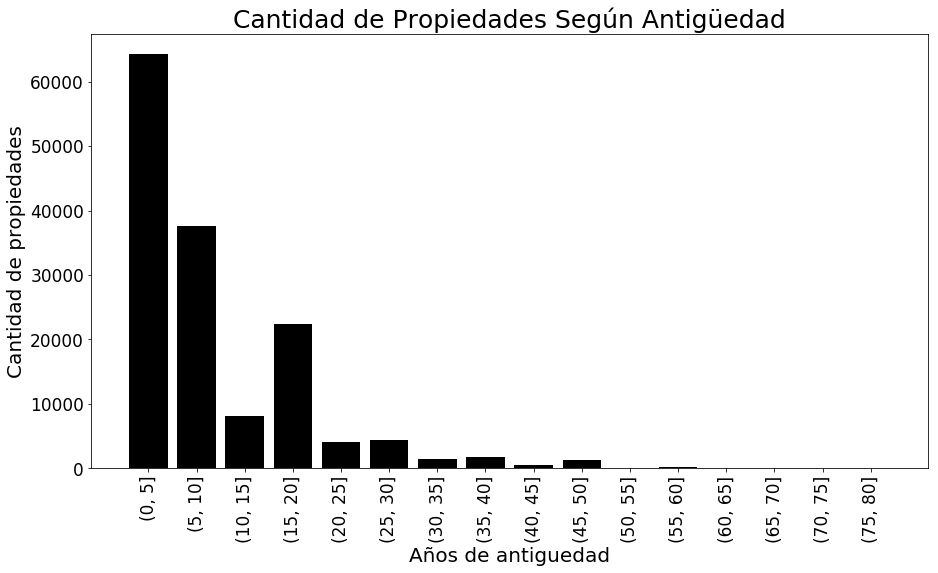

In [153]:
bins = pd.cut(dfok["Antiguedad"], [i for i in range(0, 81, 5)])
df_ant = dfok.groupby(bins).size()
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_ant.index.astype(str), df_ant.values, color = 'black')
plt.xlabel("Años de antiguedad", fontsize=20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.title("Cantidad de Propiedades Según Antigüedad", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.xticks(rotation = 90)


### Podemos ver que la mayoria de las propiedades tienen una antiguedad relativamente baja(0-10 años) junto con una gran cantidad teniendo entre 15 y 20 años.

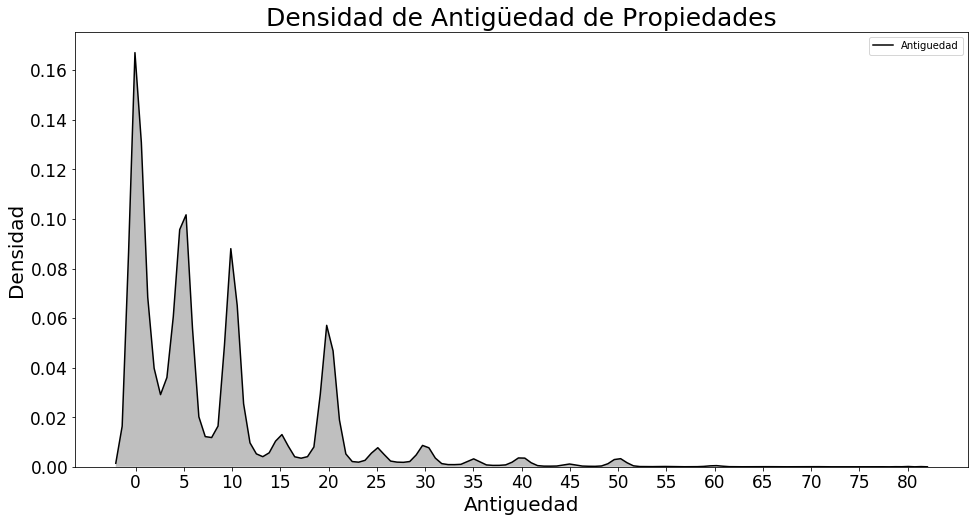

In [154]:
df_ant = dfok[pd.notnull(dfok["Antiguedad"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['Antiguedad'], shade=True, color = 'black')
plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Antiguedad", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Antigüedad de Propiedades", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


### Los distintos picos que se ven nos permiten concluir que, a pesar de que la antiguedad es cualquier numero natural, la gente suele asignarle valores que sean multiplos de 10 o de 5 con menor frecuencia (es decir, 20 años por sobre 19 o 21, 30 por sobre 29, 28 o 31, 15 por sobre 14 o 13, etc)

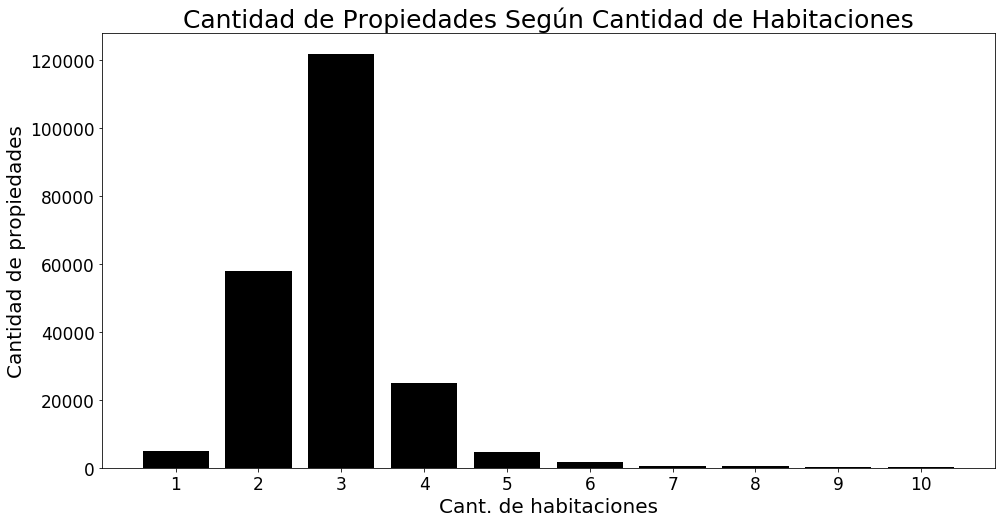

In [155]:
df_hab = dfok.groupby("CantHabitaciones").size()
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_hab.index, df_hab.values, color = 'black')
plt.xlabel("Cant. de habitaciones", fontsize =20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.xticks([i for i in range(1,11)])
plt.title("Cantidad de Propiedades Según Cantidad de Habitaciones", fontsize=25
         );

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

### Se puede observar que la  gran mayoria de las casas cuentan con 2 o 3 habitaciones y 4 con menor frecuencia.

In [156]:
df_pubmes = dfok.copy()

In [157]:
df_pubmes["Fecha"] = df_pubmes["Fecha"].astype('datetime64')

In [158]:
df_pubmes.index = df_pubmes["Fecha"]

In [159]:
df_pubmes = pd.DataFrame(df_pubmes.resample('M').size()).reset_index()

In [160]:
df_pubmes = df_pubmes.rename(columns={0:"Cantidad"})

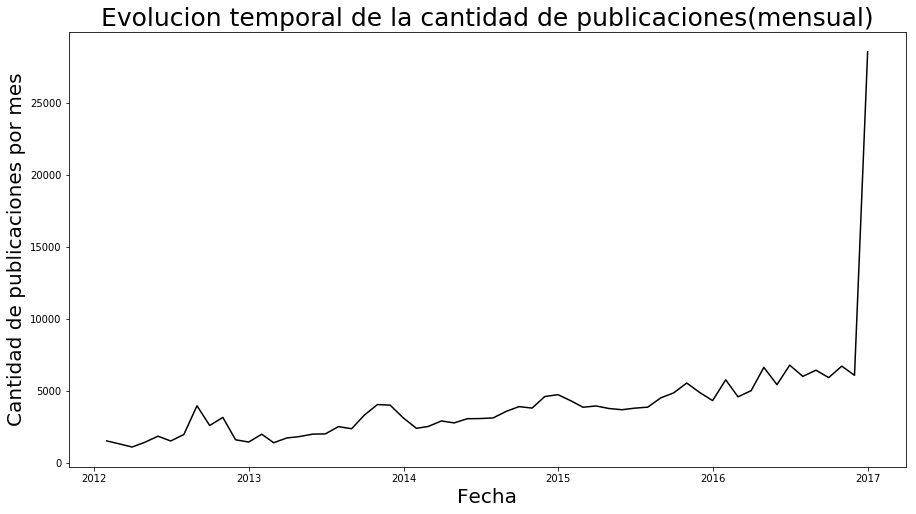

In [161]:
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Cantidad", data=df_pubmes, color="black")
plt.title("Evolucion temporal de la cantidad de publicaciones(mensual)", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de publicaciones por mes", fontsize=20);

### Veamos como varia la cantidad mensual de publicaciones para cada año

In [162]:
df_pub_an = dfok.copy()

In [163]:
df_pub_an["Fecha"] = df_pub_an["Fecha"].astype('datetime64')

In [164]:
df_pub_an.index = df_pub_an["Fecha"]

In [165]:
df_pub_an = pd.DataFrame(df_pub_an.resample('M').size())

In [166]:
pub_12 = df_pub_an["2012-01-01":"2013-01-01"].reset_index()

In [167]:
pub_13 = df_pub_an["2013-01-01":"2014-01-01"].reset_index()

In [168]:
pub_14 = df_pub_an["2014-01-01":"2015-01-01"].reset_index()

In [169]:
pub_15 = df_pub_an["2015-01-01":"2016-01-01"].reset_index()

In [170]:
pub_16 = df_pub_an["2016-01-01":"2017-01-01"].reset_index()

In [171]:
pub_12 = pub_12.rename(columns={0:"Cantidad"})

In [172]:
pub_13 = pub_13.rename(columns={0:"Cantidad"})

In [173]:
pub_14 = pub_14.rename(columns={0:"Cantidad"})

In [174]:
pub_15 = pub_15.rename(columns={0:"Cantidad"})

In [175]:
pub_16 = pub_16.rename(columns={0:"Cantidad"})

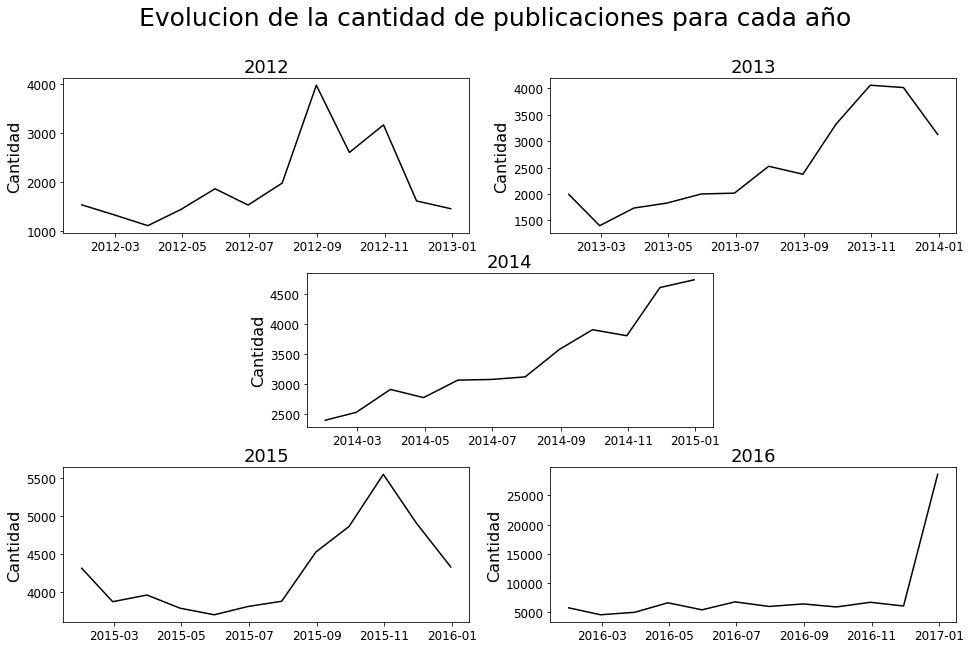

In [176]:
fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(6, 4, hspace=0.7, wspace=0.5)
pubs_12 = fig.add_subplot(grid[:2, 0:2])
pubs_13 = fig.add_subplot(grid[:2, 2:])
pubs_14 = fig.add_subplot(grid[2:4, 1:3])
pubs_15 = fig.add_subplot(grid[4:6, 0:2])
pubs_16 = fig.add_subplot(grid[4:6, 2:4])


pubs_12.plot("Fecha", "Cantidad", data=pub_12, color="black")
pubs_13.plot("Fecha", "Cantidad", data=pub_13, color="black")
pubs_14.plot("Fecha", "Cantidad", data=pub_14, color="black")
pubs_15.plot("Fecha", "Cantidad", data=pub_15, color="black")
pubs_16.plot("Fecha", "Cantidad", data=pub_16, color="black")

pubs_12.title.set_text("2012")
pubs_13.title.set_text("2013")
pubs_14.title.set_text("2014")
pubs_15.title.set_text("2015")
pubs_16.title.set_text("2016")

pubs_12.title.set_size(18)
pubs_13.title.set_size(18)
pubs_14.title.set_size(18)
pubs_15.title.set_size(18)
pubs_16.title.set_size(18)


pubs_12.set_ylabel("Cantidad", fontsize=16)
pubs_13.set_ylabel("Cantidad", fontsize=16)
pubs_14.set_ylabel("Cantidad", fontsize=16)
pubs_15.set_ylabel("Cantidad", fontsize=16)
pubs_16.set_ylabel("Cantidad", fontsize=16)

pubs_12.tick_params(axis='both', which='major', labelsize = 12)
pubs_12.tick_params(axis='both', which='minor', labelsize = 12)

pubs_13.tick_params(axis='both', which='major', labelsize = 12)
pubs_13.tick_params(axis='both', which='minor', labelsize = 12)

pubs_14.tick_params(axis='both', which='major', labelsize = 12)
pubs_14.tick_params(axis='both', which='minor', labelsize = 12)

pubs_15.tick_params(axis='both', which='major', labelsize = 12)
pubs_15.tick_params(axis='both', which='minor', labelsize = 12)

pubs_16.tick_params(axis='both', which='major', labelsize = 12)
pubs_16.tick_params(axis='both', which='minor', labelsize = 12)


fig.suptitle('Evolucion de la cantidad de publicaciones para cada año', size=25);

### Veamos si hay alguna peculiaridad con el mes de diciembre de 2016 que parece tener un gran pico en la cantidad de publicaciones, podria ser que algunos datos se hayan capeado con el ultimo dia del año o alguna situacion similar.

In [177]:
df_pubdic = dfok.copy()

In [178]:
df_pubdic["Fecha"] = df_pubdic["Fecha"].astype('datetime64')

In [179]:
df_pubdic.index = df_pubdic["Fecha"]

In [180]:
df_pubdic = df_pubdic.sort_index()

In [181]:
df_pubdic = df_pubdic["2016-12-01 00:00:00":"2017-01-02 00:00:00"]

In [182]:
df_pubdic = pd.DataFrame(df_pubdic.resample('D').size()).reset_index()

In [183]:
df_pubdic = df_pubdic.rename(columns={0:"Cantidad"})

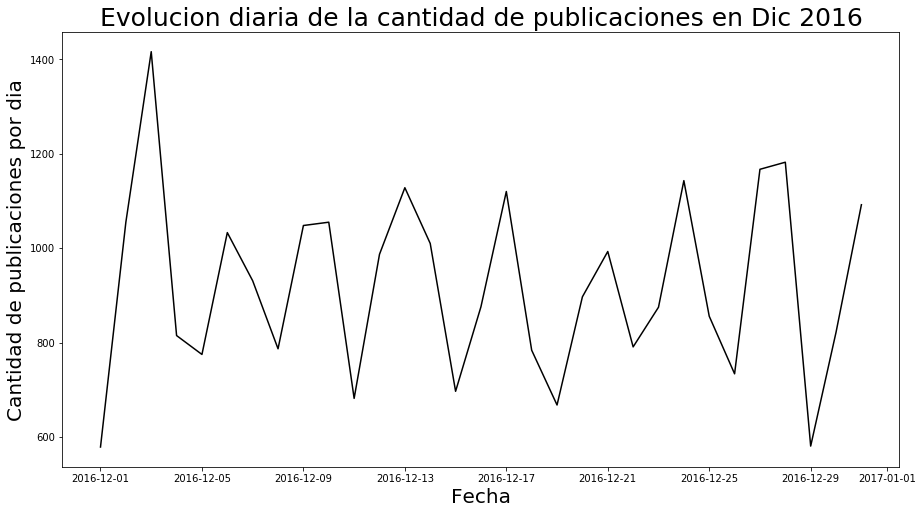

In [184]:
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Cantidad", data=df_pubdic, color="black")
plt.title("Evolucion diaria de la cantidad de publicaciones en Dic 2016", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de publicaciones por dia", fontsize=20);

### Como podemos observar no parece haber una acumulacion de publicaciones en un dia particular del mes, por lo que no parece haber alguna alteracion de los datos en ese sentido.

In [185]:
dfok['Precio'].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

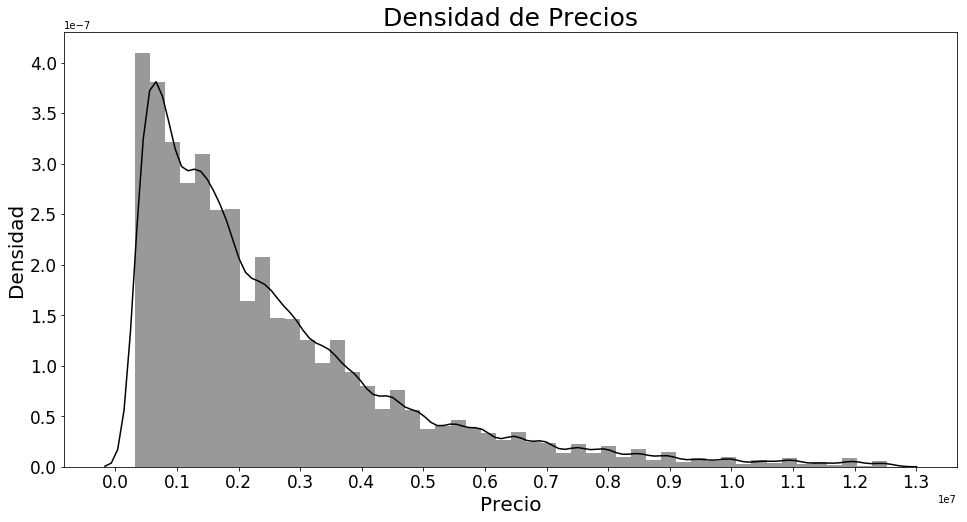

In [186]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(dfok['Precio'], color = 'black')
plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Precios", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

#### Veamos si efectivamente los precios siguen una distribucion Log-normal, esto lo haremos aplicando logaritmo a los precios y viendo si lo resultante sigue una distribucion normal

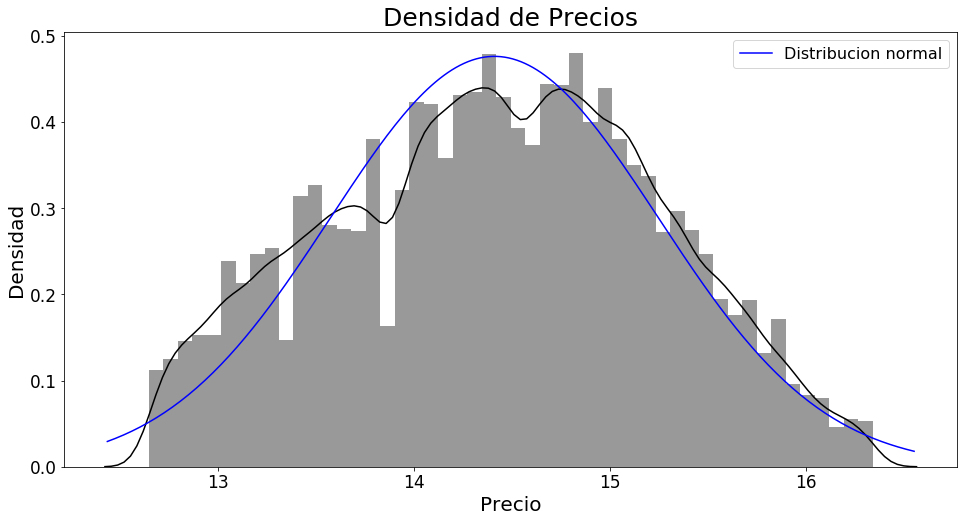

In [187]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(np.log(dfok['Precio']), color = 'black', fit=norm, fit_kws={"color":"blue"})
# plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.legend(["Distribucion normal"], fontsize=16)
plt.title("Densidad de Precios", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

## Ver con cual de los dos graficos nos quedamos

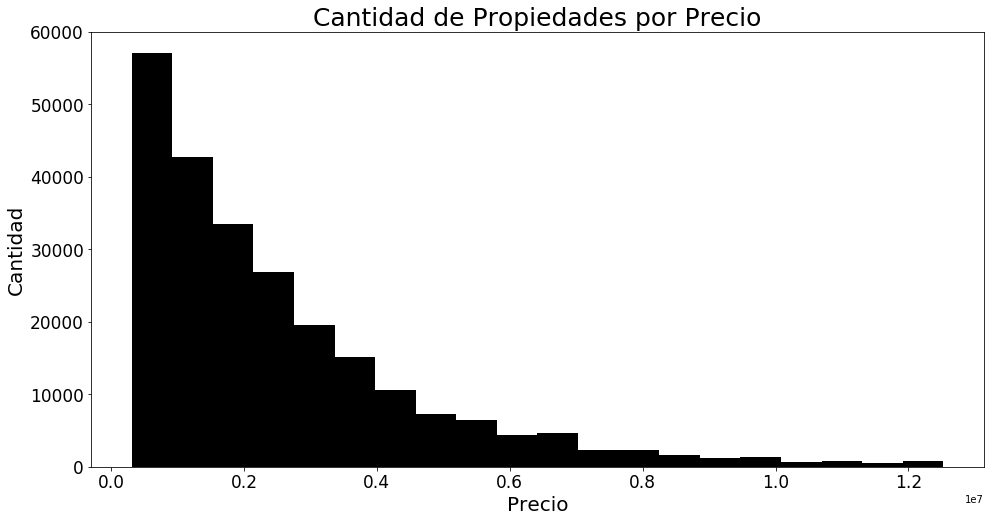

In [188]:
''' ¿Hay más propiedades caras o baratas?'''

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.xlabel("Precio", fontsize = 20);
plt.ylabel("Cantidad", fontsize = 20);

# Título
plt.title("Cantidad de Propiedades por Precio", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
    # plt.xticks(rotation = 90)

# Límites para cada coordenada
    # plt.ylim([13, 34]);
    # plt.xlim([-116, -86]);

# Tipo de gráficok
plt.hist(dfok['Precio'], color = 'black', bins = 20);

''' Los mayores precios se encuentran concentrados para la minoría de las propiedades. ''';

In [189]:
df_pt = dfok.copy()

In [190]:
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')

In [191]:
df_pt.index = df_pt["Fecha"]

In [192]:
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()

In [193]:
df_pt["Fecha"] = df_pt.index

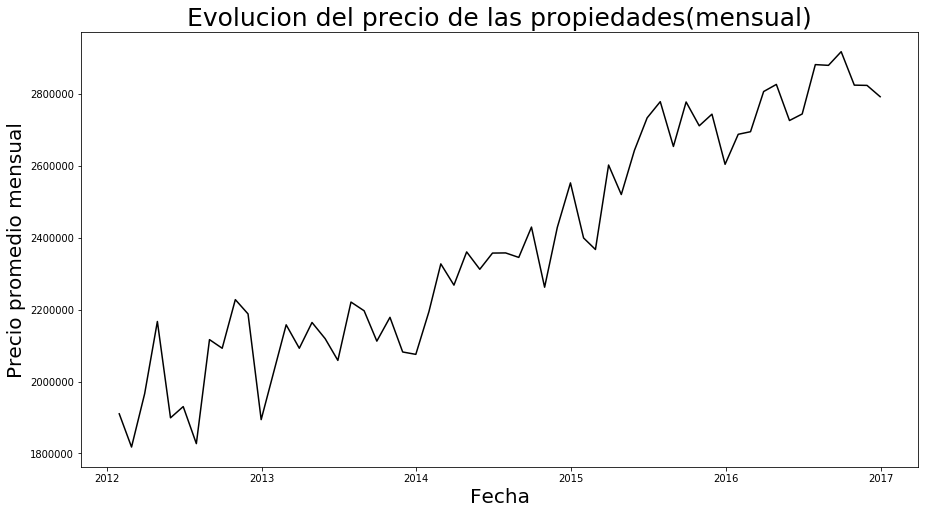

In [194]:
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del precio de las propiedades(mensual)", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio promedio mensual", fontsize=20);

In [195]:
df_inflacion = pd.read_csv("data/inflacion_mexico_2012-2016.csv", names=["Fecha", "Inflacion"])

##### Ojito con esto

In [196]:
#import locale
#locale.setlocale(locale.LC_TIME, 'es_AR.UTF-8')

In [197]:
#df_inflacion["Fecha"] = pd.to_datetime(df_inflacion["Fecha"], format="%b %Y")

In [198]:
df_inflacion.index = df_inflacion["Fecha"]

In [199]:
#df_inflacion = df_inflacion.resample('M').mean().reset_index()

In [200]:
df_pt = df_pt.reset_index(drop=True)

In [201]:
#df_ptaj = df_pt.merge(df_inflacion)

In [202]:
#df_ptaj.iloc[0,2] = 0 # Para tomar como base Enero de 2012

In [203]:
#df_ptaj["Inflacion"] = df_ptaj["Inflacion"].cumsum()

In [204]:
#df_ptaj["Multiplicador"] = 1 + df_ptaj["Inflacion"]/100

In [205]:
#df_ptaj["Precio_ajustado"] = df_ptaj["Precio"]/df_ptaj["Multiplicador"]

In [206]:
#plt.figure(figsize=(15,8))
#plt.plot("Fecha", "Precio_ajustado", data=df_ptaj, color="black")
#plt.title("Evolucion del precio de las propiedades(mensual) ajustado por inflacion", fontsize=25)
#plt.xlabel("Fecha", fontsize=20)
#plt.ylabel("Precio promedio mensual", fontsize=20);

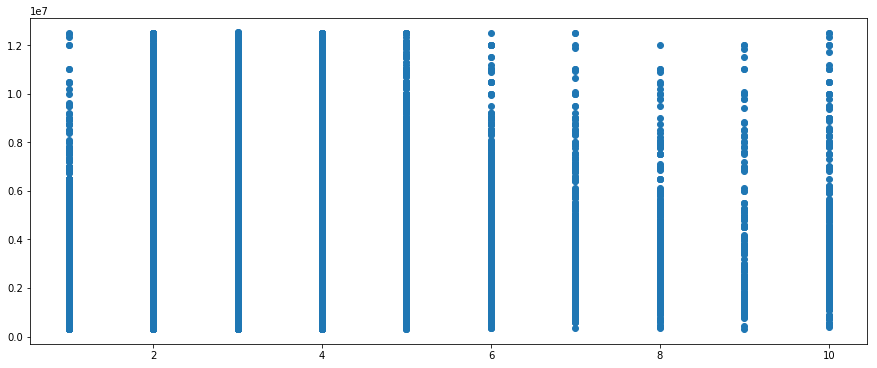

In [207]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (15, 6))

# Variables a graficar
x = dfok['CantHabitaciones']
y = dfok['Precio']

# Tipo de gráfico
plt.scatter(x, y)

''' No se aprecia una tendencia clara. ''';

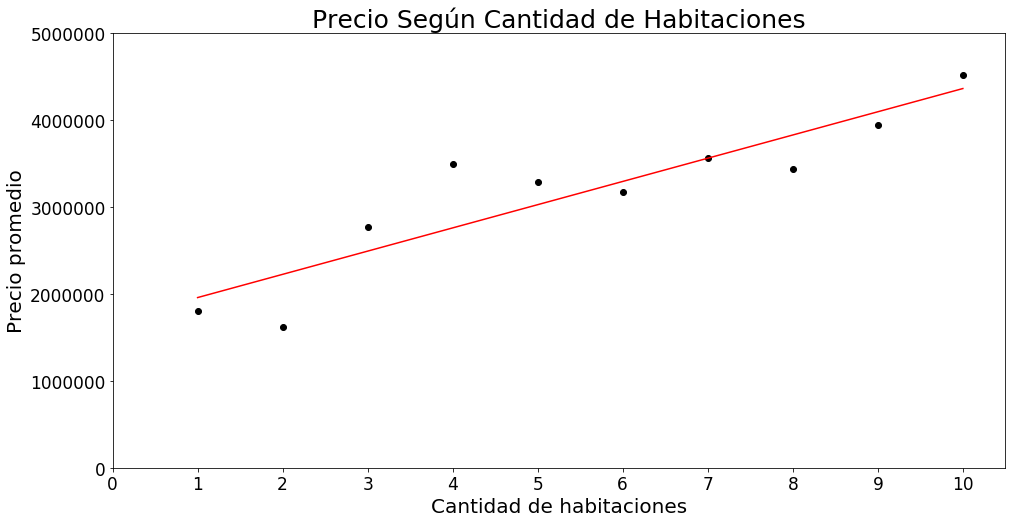

In [208]:
''' ¿El precio promedio es proporcional a la cantidad de habitaciones?
'''
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfok.groupby('CantHabitaciones').mean()['Precio']

fig = plt.figure(figsize = (16,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

plt.xlim([0, 10.5])
plt.ylim([0, 5000000])

plt.xlabel("Cantidad de habitaciones", fontsize = 20)
plt.ylabel("Precio promedio", fontsize= 20)
plt.title("Precio Según Cantidad de Habitaciones", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

plt.xticks([i for i in range(11)])

# Tipo de gráfico
plt.scatter(x, y, color = 'black');
ldt = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, ldt(x), "r");

## El precio parece tender a aumentar a medida que aumenta la cantidad de habitaciones

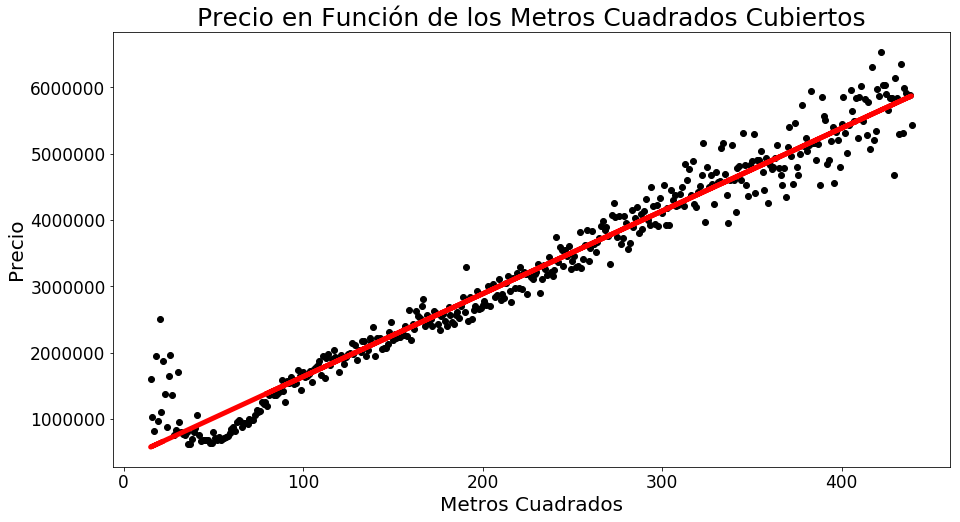

In [209]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosCubiertos'].unique(), 
                                index = dfok['MetrosCuadradosCubiertos'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosCubiertos').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 92%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
x = dfPorMetros['Metros']
y = dfPorMetros['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados Cubiertos", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.scatter(x, y, color = 'black')

#Línea de regresión
regre = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, regre(x), "red", linewidth = 5);

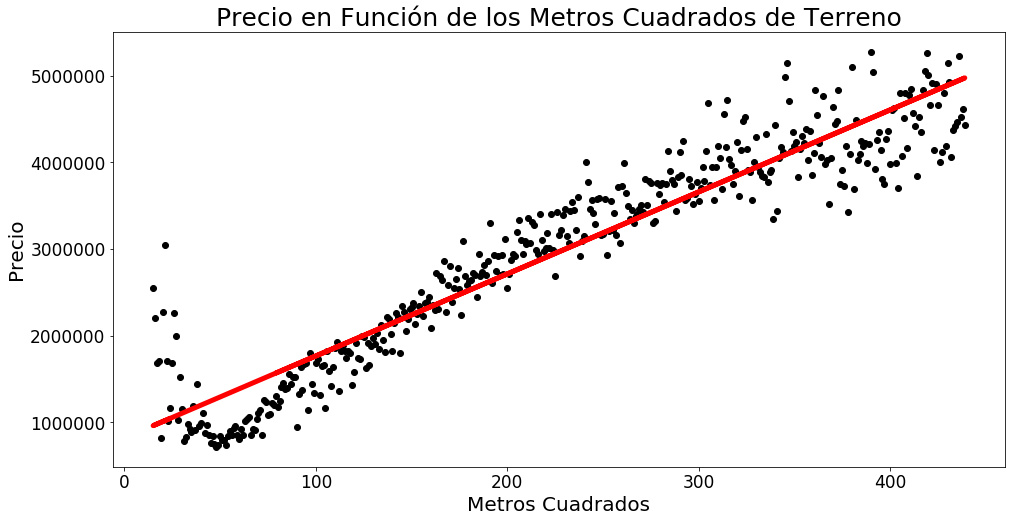

In [210]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosTotales'].unique(), 
                                index = dfok['MetrosCuadradosTotales'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosTotales').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 80%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
x = dfPorMetros['Metros']
y = dfPorMetros['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (16, 8));

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados de Terreno", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.scatter(x, y, color = 'black')

#Línea de regresión
regre = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, regre(x), "red", linewidth = 5);

### México está en el hemisferio norte, por lo que la latitud debe ser positiva, ademas está al oeste del meridiano de Greenwich, por lo que su longitud debe ser negativa

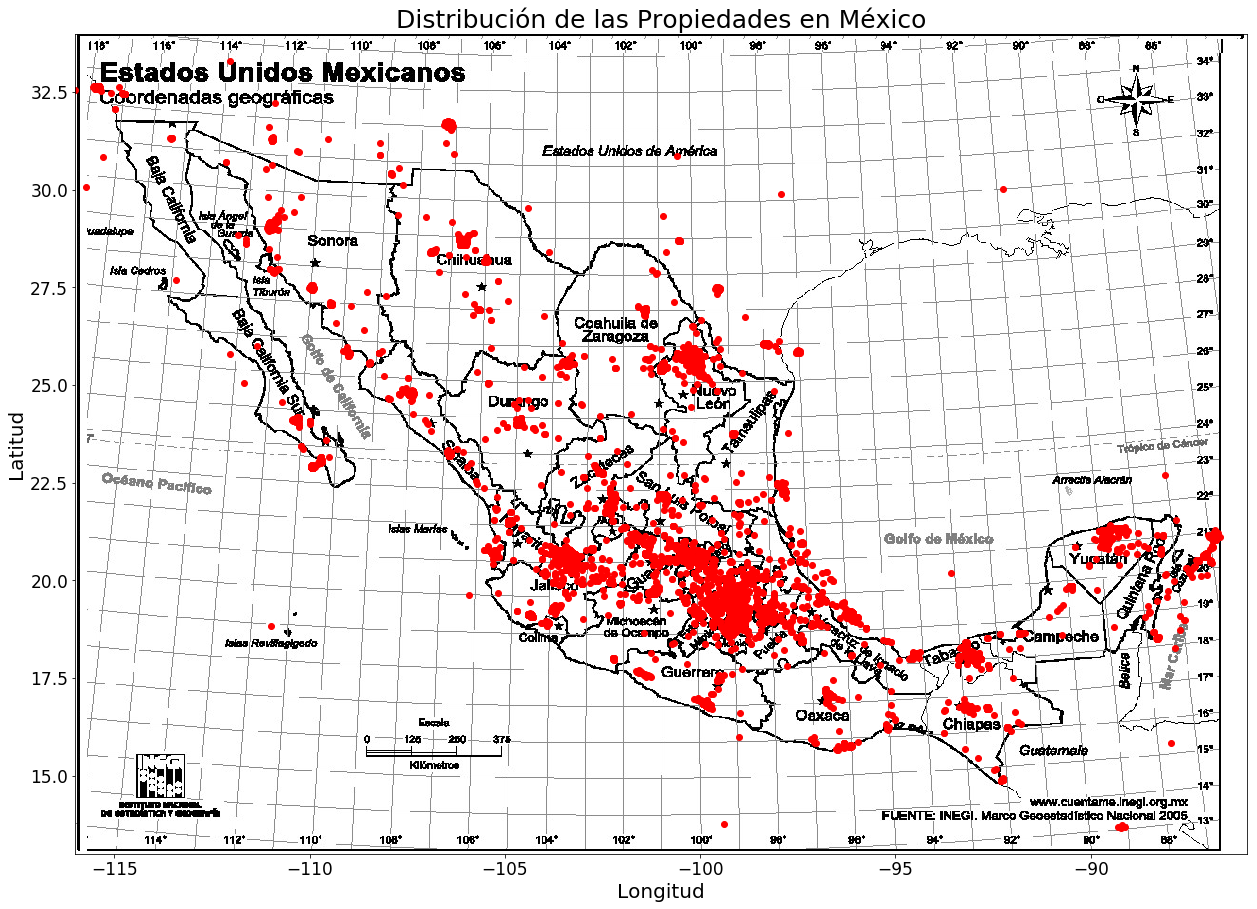

In [211]:
# Declarás variables a graficar
x = dfok['Longitud']
y = dfok['Latitud']

# Tamaño del gráfico
grafico, ax = plt.subplots(figsize = (21, 16));


img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades en México", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

# Tipo de gráficok
plt.scatter(x, y, color = "red");


In [212]:
''' Propiedades con coordenadas incorrectas
'''

len(dfok[ (dfok['Latitud'] > 34) | (dfok['Latitud'] < 13) | (dfok['Longitud'] > -86) | (dfok['Longitud'] < -116) ])


2206

<BarContainer object of 24 artists>

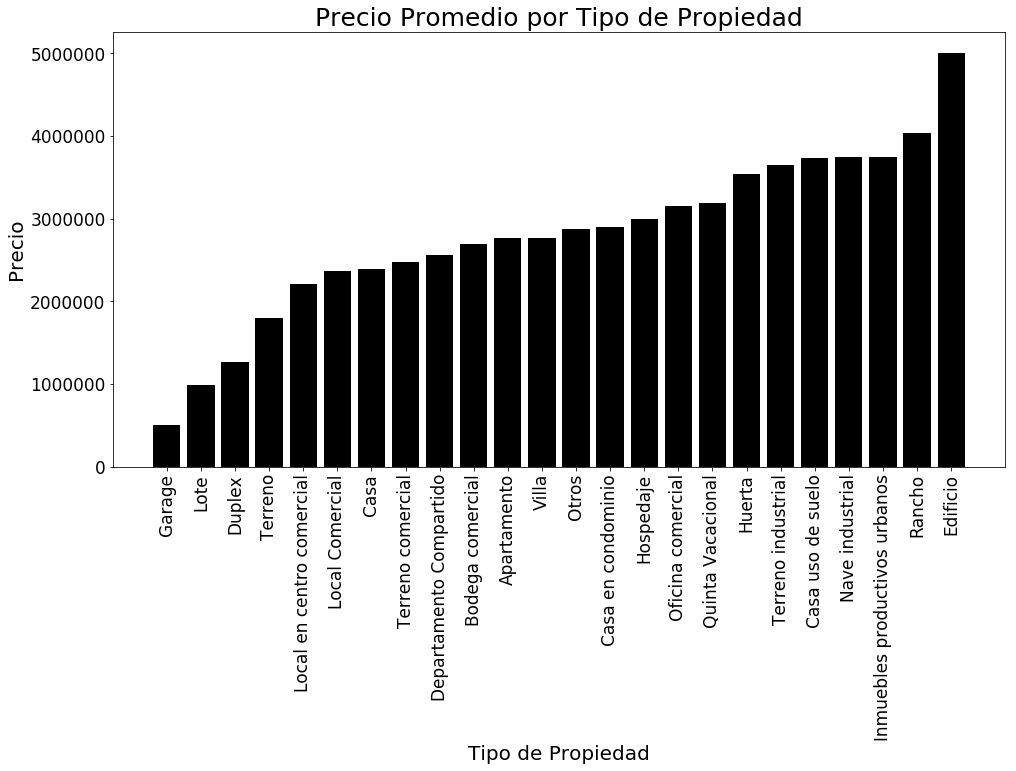

In [213]:
''' ¿Cuáles propiedades son más caras en promedio? '''

dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), index = dfok['TipoPropiedad'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('TipoPropiedad').mean()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['TipoPropiedad'] = dfPorPropiedad['TipoPropiedad'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['TipoPropiedad']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Tipo de Propiedad", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio Promedio por Tipo de Propiedad", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


In [214]:
dfok.nsmallest(15, 'MetrosCuadradosTotales')

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
1224,53862,vendo loca plaza esmeralda,Local Comercial,850000,2013-11-08,5.0,NaN,15.0,<p></p>\r\n<p class=sangra3detindependiente>caracter&iacute;sticas:</p>\r\n<p></p>\r\n<p class=s...,NaN,0.0,NaN,24853.0,"Calzada del Hueso, Col. Granjas Coapa",Tlalpan,Distrito Federal,19.300000,-99.101497,False,False,False,False,False
14570,247515,vendo consultorio excelente zona,Oficina comercial,500000,2014-09-14,5.0,15.0,15.0,"venta de consultorio \n\nexcelente ubicación!! dentro de heliplaza lomas verdes, con todos los s...",1.0,1.0,NaN,286309.0,Av. Lomas Verdes 825 - 22B,Naucalpan de Juárez,Edo. de México,NaN,NaN,False,False,False,True,True
14600,245700,hermosa en venta,Casa,720000,2015-02-13,10.0,63.0,15.0,"hermosa en venta de dos plantas muy bonita en excelentes condiciones cuenta con dos recamaras, ...",3.0,1.0,1.0,48223.0,VILLAS TULUM 1216,Zapopan,Jalisco,NaN,NaN,False,False,False,True,True
21275,173002,locales frente plaza comerc. centro sur 10.5% descuento pago en efectivo,Local Comercial,1597500,2016-12-31,NaN,15.0,15.0,"locales nuevos en venta en un nuevo desarrollo con muy buena ubicación, en el sur de la zona met...",NaN,0.0,1.0,48749.0,prolongación Colón,Tlaquepaque,Jalisco,20.605238,-103.401108,False,False,False,True,True
25293,278888,"comercio clave en venta en montecristo, merida , yucatan",Local Comercial,2800000,2012-10-02,0.0,250.0,15.0,"excelente casa 2 plantas, al norte de mérida, sobre una de las principales avenidas de uno de lo...",NaN,0.0,NaN,113902.0,"Comercio clave en Venta en Montecristo,",Mérida,Yucatán,NaN,NaN,False,False,False,False,False
33462,23683,se vende bonita casa en la purificacion,Casa,9700000,2014-12-23,5.0,250.0,15.0,"bonita casa tipo colonial con jardin , 3 recamaras , 2 baños , sala, comedor, despacho, alberca....",3.0,NaN,2.0,58727.0,TEXCALTITLAN,Texcoco,Edo. de México,NaN,NaN,False,False,False,False,True
35818,134857,"casa clave en venta en alcala martin, merida , yucatan",Casa,3000000,2012-10-02,0.0,370.0,15.0,"primorosa casa de 1 planta tipo contempor&aacute;neo, al norte de m&eacute;rida en perfectas con...",NaN,0.0,NaN,113827.0,"Casa clave en Venta en Alcala Martin, M",Mérida,Yucatán,NaN,NaN,False,False,False,False,False
45259,182269,casa en venta en gómez palacio centro,Casa,1500000,2012-08-17,45.0,NaN,15.0,"casa centrica, ideal para oficinas, cuenta con 7 recámaras con su baño y closet, buen espacio de...",7.0,3.0,NaN,29773.0,Constitución,Gómez Palacio,Durango,NaN,NaN,False,False,False,True,False
52062,267962,locales en preventa en andador sur,Local Comercial,1500000,2016-10-22,NaN,15.0,15.0,"venta o renta de locales a un costado de centro sur, entrega en 4 meses, inmenso tráfico peatona...",NaN,NaN,NaN,129898.0,Centro sur,Tlaquepaque,Jalisco,NaN,NaN,False,False,False,True,True
53974,94268,nueva azacoalco casita-condominio,Casa en condominio,630000,2012-11-23,30.0,55.0,15.0,"casita-condominio en tres niveles pb=hall de entrada con bodeguita y escaleras, 1er piso=sala-co...",1.0,1.0,1.0,23990.0,NUEVA AZACOALCO CASITA-CONDOMINIO,Gustavo A. Madero,Distrito Federal,NaN,NaN,False,False,False,False,False


In [215]:
df_aux = dfok.copy()

In [216]:
def rango_del_precio(df):
    if df["Precio"] <= 1000000:
        return "0\$ - 1,000,000\$"
    elif 1000000 < df["Precio"] <= 2000000:
        return "1,000,000\$ - 2,000,000\$"
    elif 2000000 < df["Precio"] <= 3000000:
        return "2,000,000\$ - 3,000,000\$"
    elif 3000000 < df["Precio"] <= 4000000:
        return "3,000,000\$ - 4,000,000\$"
    elif 4000000 < df["Precio"] <= 6000000:
        return "4,000,000\$ - 6,000,000\$"
    elif 6000000 < df["Precio"] <= 8000000:
        return "6,000,000\$ - 8,000,000\$"
    elif 8000000 < df["Precio"] <= 10000000:
        return "8,000,000\$ - 10,000,000\$"
    elif 10000000 < df["Precio"]:
        return "10,000,000\$ - 14,000,000\$"

In [217]:
df_aux["RangoDePrecios"] = df_aux.apply(rango_del_precio, axis=1)

In [218]:
df_aux = df_aux[["RangoDePrecios", "TieneGimnasio", "TieneUsosMultiples", "TienePileta", "TieneEscuelasCerca", "TieneShoppingsCerca"]]

In [219]:
df_rango = df_aux.groupby("RangoDePrecios").mean().reset_index()

In [220]:
"""Reordeno una fila del DF a mano para que se vean en el orden correcto los rangos de precios"""
temp = df_rango.iloc[2].copy()
df_rango.drop(df_rango.index[2], inplace=True)
df_rango = df_rango.append(temp)

In [221]:
df_rango.index = df_rango["RangoDePrecios"]

In [222]:
df_rango = df_rango.drop("RangoDePrecios", axis=1)

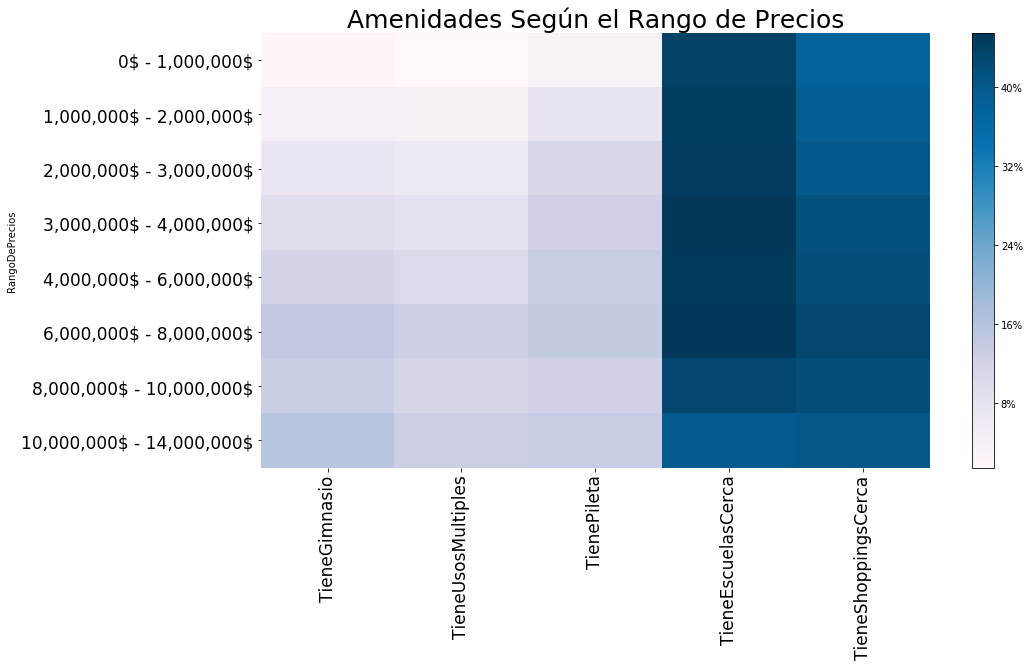

In [223]:
fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Ajustar tamaño de los títulos de los ejes


# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


ax = sb.heatmap(df_rango*100,cmap="PuBu", cbar=False);
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([8, 16, 24, 32, 40])
cbar.set_ticklabels(["8%", "16%", "24%", "32%", "40%"])
plt.title("Amenidades Según el Rango de Precios", fontsize=25);



<BarContainer object of 22 artists>

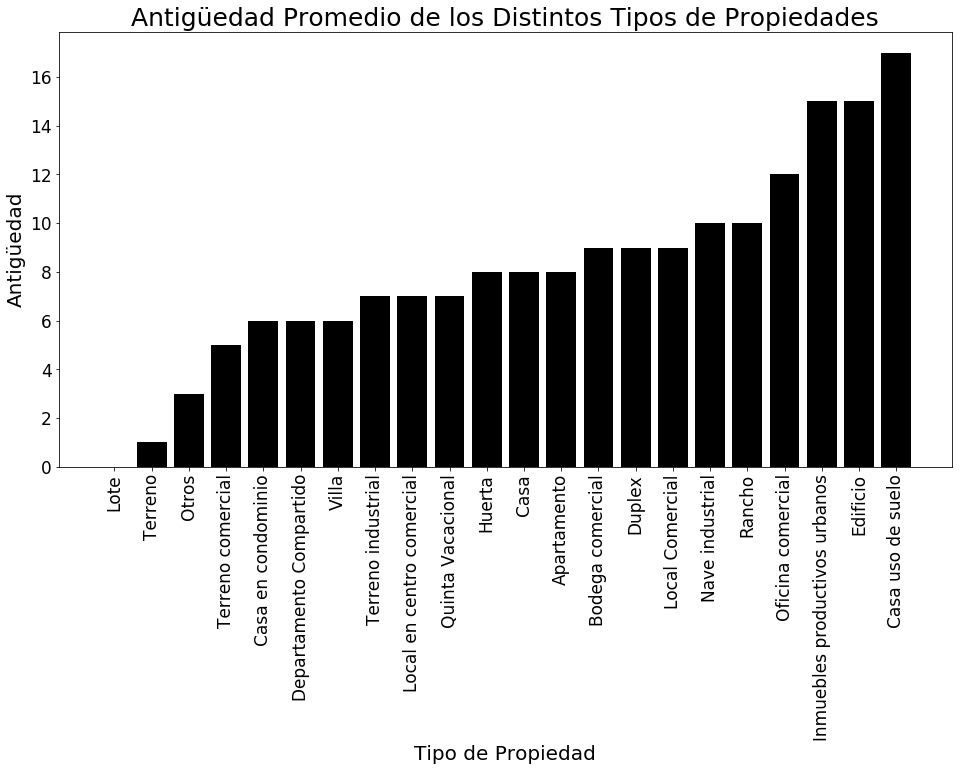

In [224]:
dfPorAntiguedad = pd.DataFrame()
dfPorAntiguedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), 
                                index = dfok['TipoPropiedad'].unique() )

dfPorAntiguedad['Antiguedad'] = dfok.groupby('TipoPropiedad')['Antiguedad'].mean()

dfPorAntiguedad = dfPorAntiguedad.dropna() #80%

dfPorAntiguedad['TipoPropiedad'] = dfPorAntiguedad['TipoPropiedad'].astype('category')
dfPorAntiguedad['Antiguedad'] = dfPorAntiguedad['Antiguedad'].astype(np.uint8)

dfPorAntiguedad = dfPorAntiguedad.sort_values(['Antiguedad'])

# Variables a graficar
y = dfPorAntiguedad['Antiguedad']
x = dfPorAntiguedad['TipoPropiedad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.ylabel("Antigüedad", fontsize = 20);
plt.xlabel("Tipo de Propiedad", fontsize = 20);

# Título
plt.title("Antigüedad Promedio de los Distintos Tipos de Propiedades", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
#ldt = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, ldt(x), "g")


In [225]:
len(dfok.groupby('Ciudad').head(1000).groupby('TipoPropiedad')['Precio'])

23

In [226]:
casas = dfok[ dfok['TipoPropiedad'] == 'Casa']

In [227]:
casas.describe()

,ID,Precio,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,CantHabitaciones,CantGarages,CantBanos,IDZona,Latitud,Longitud
count,141717.000000,1.417170e+05,119026.000000,135185.000000,125061.000000,138379.000000,117756.000000,133108.000000,1.231560e+05,65628.000000,65628.000000
mean,149850.929797,2.398158e+06,8.272588,194.026911,183.767889,3.092080,1.705926,2.240429,1.191557e+06,21.257246,-99.937932
std,86745.061327,1.999307e+06,9.648238,98.515058,91.831447,0.881185,0.791163,0.933291,7.364818e+06,3.568182,10.077705
min,1.000000,3.100000e+05,0.000000,15.000000,15.000000,1.000000,0.000000,1.000000,2.200000e+01,-100.886679,-125.859375
25%,74709.000000,9.272000e+05,0.000000,113.000000,112.000000,3.000000,1.000000,2.000000,4.773200e+04,19.387642,-103.265256
50%,149751.000000,1.800000e+06,5.000000,180.000000,160.000000,3.000000,2.000000,2.000000,5.974000e+04,20.552883,-99.665278
75%,225038.000000,3.200000e+06,10.000000,260.000000,245.000000,3.000000,2.000000,3.000000,9.260600e+04,21.857708,-99.122212
max,299998.000000,1.252100e+07,80.000000,439.000000,439.000000,10.000000,3.000000,4.000000,5.000400e+07,83.026219,121.036000


In [228]:
dptos = dfok[ dfok['TipoPropiedad'] == 'Apartamento']

In [229]:
dptos.describe()

,ID,Precio,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,CantHabitaciones,CantGarages,CantBanos,IDZona,Latitud,Longitud
count,57341.000000,5.734100e+04,48290.000000,56518.000000,29348.000000,56347.000000,53605.000000,56004.000000,5.277900e+04,30035.000000,30035.000000
mean,150391.759160,2.763769e+06,8.362021,117.048657,117.907762,2.386533,1.410242,1.816817,5.598419e+06,19.679672,-98.780159
std,86404.604388,2.342775e+06,9.524304,67.299715,67.700617,0.630951,0.749516,0.768021,1.567089e+07,1.883412,8.606936
min,9.000000,3.100000e+05,0.000000,16.000000,15.000000,1.000000,0.000000,1.000000,2.200000e+01,-34.612892,-117.120217
25%,75848.000000,1.050000e+06,1.000000,69.000000,70.000000,2.000000,1.000000,1.000000,2.381500e+04,19.360492,-99.260620
50%,150700.000000,1.989328e+06,5.000000,96.000000,97.000000,2.000000,1.000000,2.000000,4.749800e+04,19.399537,-99.180081
75%,225185.000000,3.731625e+06,10.000000,143.000000,145.000000,3.000000,2.000000,2.000000,8.782650e+04,19.480908,-99.144354
max,299995.000000,1.252000e+07,80.000000,438.000000,438.000000,10.000000,3.000000,4.000000,5.000400e+07,62.593341,100.402598


In [230]:
1999307 / pow(len(casas), 1/2) #De Moivre

5310.90473707445

In [231]:
2342775 / pow(len(dptos), 1/2) #De Moivre

9783.583359412307

In [232]:
len(casas)

141717

In [233]:
len(dptos)

57341

In [234]:
pd.set_option('display.max_rows', 40) #como mucho ver 50 filas
casasPorProvincia = casas.groupby('Provincia')['Precio'].mean().to_frame()
dptosPorProvincia = dptos.groupby('Provincia')['Precio'].mean().to_frame()

In [235]:
dfInTime = pd.DataFrame()
dfInTime['Fecha'] = dfok['Fecha']
dfInTime['Precio'] = dfok['Precio']
dfInTime.groupby('Fecha')

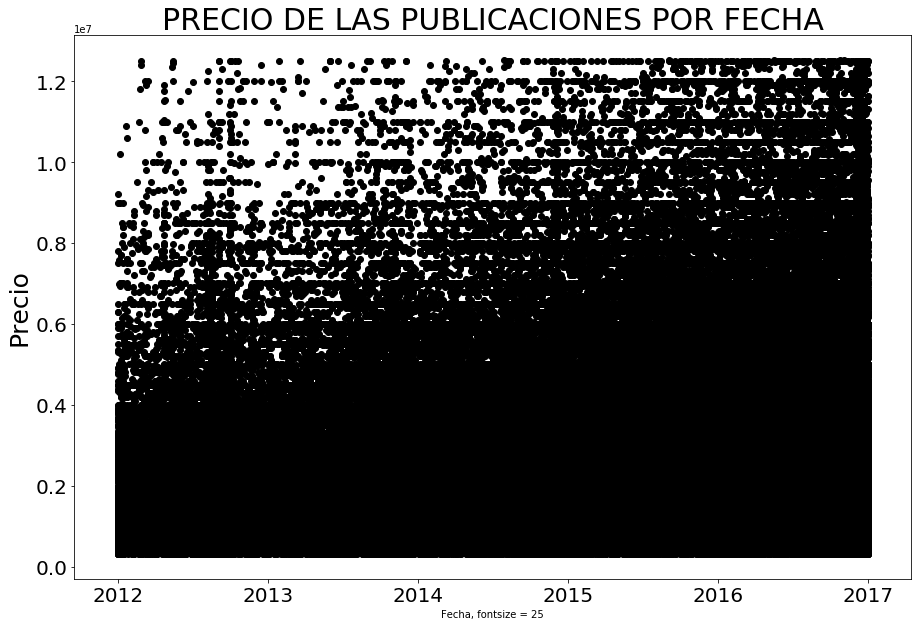

In [236]:
x = dfok['Fecha']
y = dfok['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (15, 10))

# Tamaño de los títulos de los ejes
plt.xlabel("Fecha, fontsize = 25")
plt.ylabel("Precio", fontsize = 25)

# Título
mp.rcParams.update( { 'axes.titlesize':'30' } )
plt.title("PRECIO DE LAS PUBLICACIONES POR FECHA")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 20)
plt.tick_params(axis='both', which='minor', labelsize = 20)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.scatter(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")

Text(0.5, 1.05, 'Comparación de Características Promedio de Casas y Departamentos')

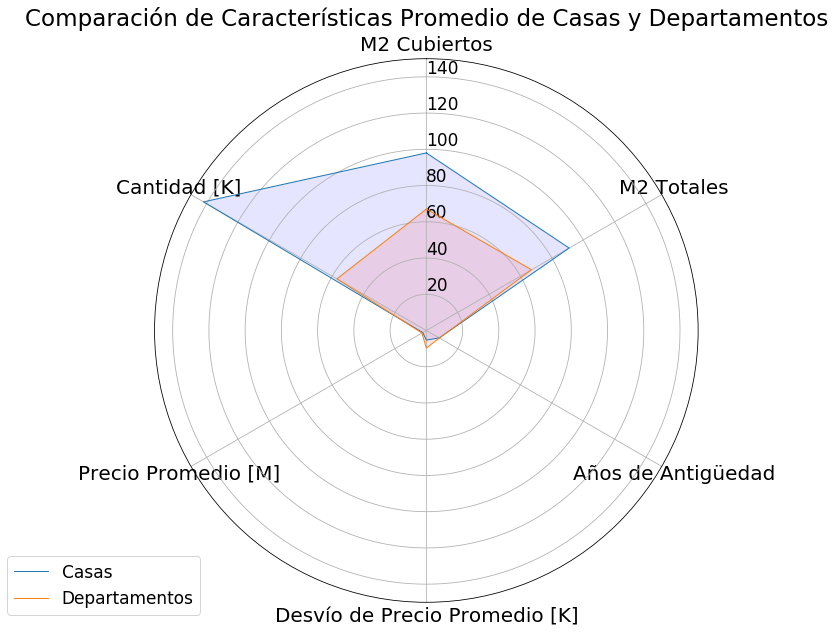

In [237]:
''' 
CÓDIGO DEL RADAR CHART SACADA DE
https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
'''

dfradar = pd.DataFrame({
    'Propiedad': ['Casas','Departamentos'],
'M2 Cubiertos': [98, 67],
    'M2 Totales': [91, 67],
'Años de Antigüedad': [8.2, 8.3],
    'Desvío de Precio Promedio [K]': [5.3, 9.7],
'Precio Promedio [M]': [2.3, 2.8],
'Cantidad [K]': [142, 57]
})
    
categories=list(dfradar)[1:]
N = len(categories)

# Ajustar ángulos
angulos = [n / float(N) * 2 * 3.1415 for n in range(N)]
angulos += angulos[:1]
 
# Crear radar
grafico = plt.figure(figsize = (15, 10));
ax = plt.subplot(111, polar = True)
# Variables en orden
ax.set_theta_offset(3.1415 / 2)
ax.set_theta_direction(-1)
 
# Poner nombres de las variables
plt.xticks(angulos[:-1], categories, color='black', size=20)
 
# Límites para las variables
ax.set_rlabel_position(0)
plt.yticks(color="black", size=17)
plt.ylim(0,150)
  
# Casas
values = dfradar.loc[0].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Casas")
ax.fill(angulos, values, 'b', alpha=0.1)
 
# Dptos
values = dfradar.loc[1].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Departamentos")
ax.fill(angulos, values, 'r', alpha=0.1)

#Cartelito
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 17})

plt.title("Comparación de Características Promedio de Casas y Departamentos", fontsize = 23)


0.0


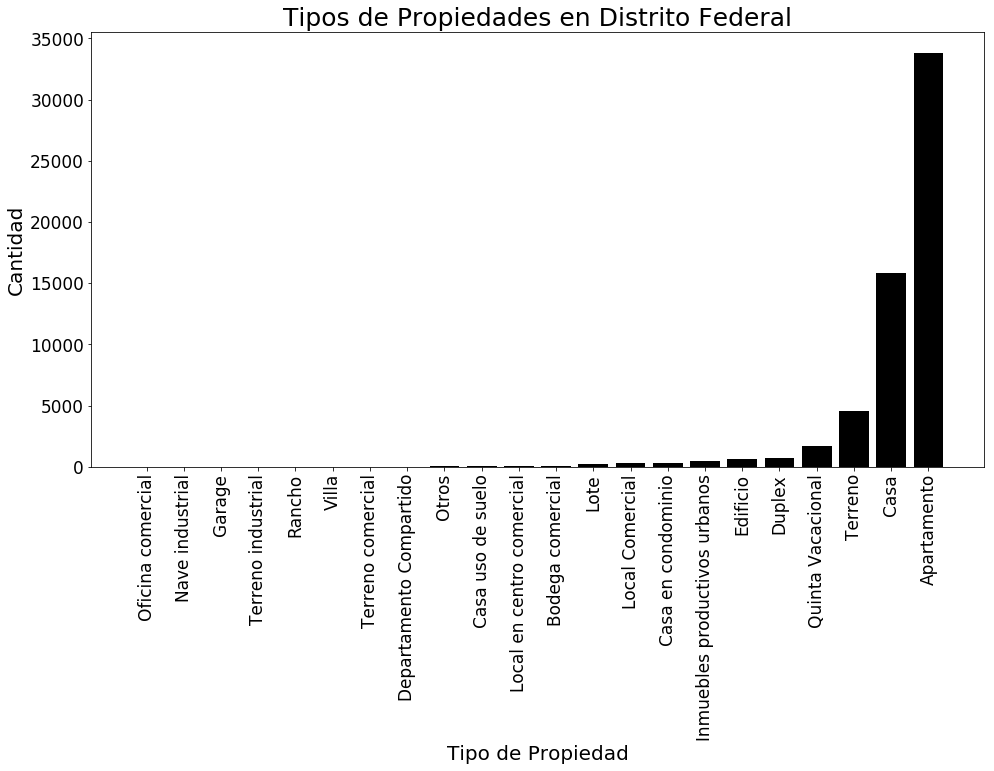

In [238]:
def propiedadesEnProvincia(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 
    #Porcentaje de NaN
    print( dfok[ dfok['Provincia'] == provincia].isnull().sum()['TipoPropiedad'] / 
          len(dfok[ dfok['Provincia'] == provincia]['TipoPropiedad']) 
         )


    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])


    x = dfgp['TipoPropiedad'] 
    y = dfgp['Cantidad'] 

    # Tamaño del gráfico
    fig = plt.figure(figsize = (16, 8))

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel("Cantidad", fontsize = 20);

    # Título
    plt.title("Tipos de Propiedades en " + provincia, fontsize = 25)
    #Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
    # mp.rcParams.update( { 'axes.titlesize':'30' } )

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada
    #plt.ylim([13, 34]);
    #plt.xlim([-116, -86]);

    # Tipo de gráfico
    plt.bar(x, y, color = 'black')

    #Línea de regresión
        #ldt = np.poly1d( np.polyfit(x, y, 1) )
        #plt.plot(x, ldt(x), "g")

    # Cajita indicadora de colores 
    #plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

    # Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)


    ### PARA REVISAR ####
    #dfok[ dfok['Provincia'] == 'Distrito Federal' ].groupby('TipoPropiedad').count()['ID'].sort_values(ascending = False)
    
propiedadesEnProvincia('Distrito Federal')

0.0


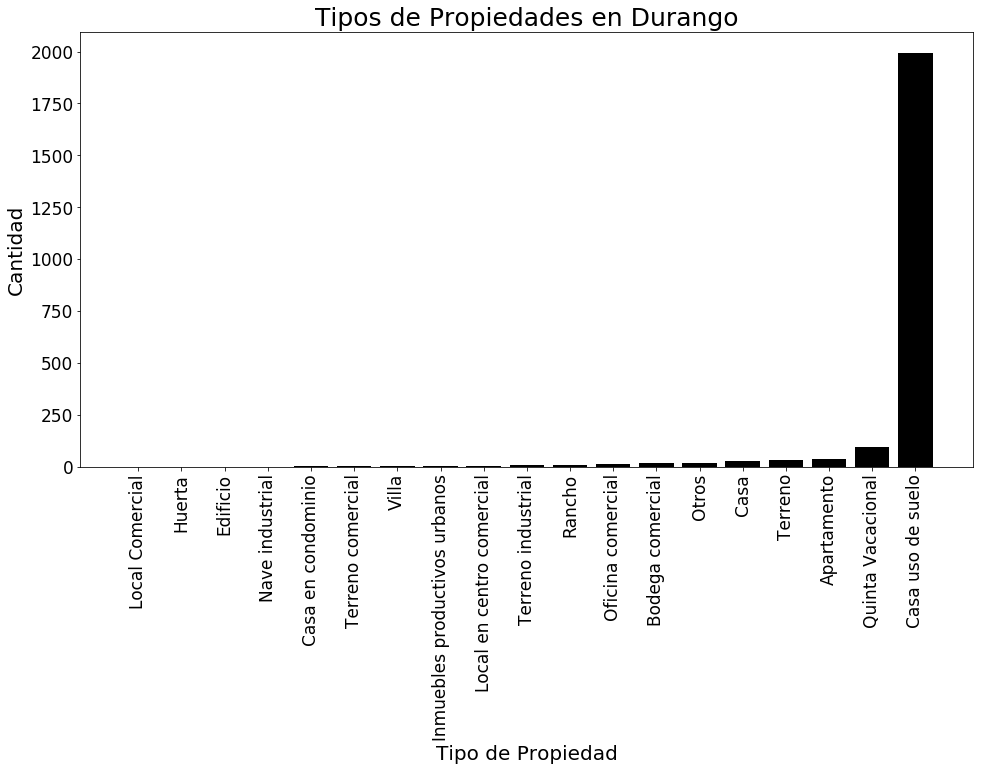

In [239]:
propiedadesEnProvincia('Durango')

In [240]:
dfok['Provincia'].unique()

array(['Distrito Federal', 'Jalisco', 'Edo. de México', 'Oaxaca',
       'Quintana Roo', 'Colima', 'San luis Potosí', 'Nuevo León',
       'Querétaro', 'Tamaulipas', 'Puebla', 'Yucatán', 'Morelos',
       'Guerrero', 'Tabasco', 'Guanajuato', 'Hidalgo', 'Veracruz',
       'Chihuahua', 'Aguascalientes', 'Sonora', 'Michoacán',
       'Baja California Norte', 'Baja California Sur', 'Coahuila',
       'Durango', 'Sinaloa', 'Chiapas', 'Nayarit', 'Tlaxcala', 'Campeche',
       'Zacatecas', nan], dtype=object)

In [241]:
def getTiposEn(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 

    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])
    
    return dfgp

In [242]:
provincias = dfok['Provincia'].unique()[0:len(dfok['Provincia'].unique()) - 1]
provincias.sort()
for p in provincias:
    df0 = getTiposEn(p)['Cantidad']
    print( df0.max() / df0.sum() )

0.764403879064461
0.8599378881987577
0.8664705882352941
0.7984790874524715
0.8019538188277087
0.8477124183006536
0.9009472259810555
0.7708333333333334
0.5755910869195442
0.8769230769230769
0.6234496683011249
0.8104895104895105
0.5922330097087378
0.8464894882982943
0.6684245220830587
0.8016997167138811
0.6305029303530053
0.7233727810650887
0.7489558861915949
0.7440225035161744
0.6311294501487381
0.6708264657405227
0.49264087468460893
0.6672214956604446
0.8023255813953488
0.9143239625167336
0.7263581488933601
0.7911419887103778
0.8533969010727056
0.7717013888888888
0.8166561514195584
0.851063829787234


In [243]:
provincias = dfok['Provincia'].unique()[0:len(dfok['Provincia'].unique()) - 1]
provincias.sort()
for p in provincias:
    df0 = getTiposEn(p)
    s = df0[ df0['Cantidad'] == df0['Cantidad'].max() ]['TipoPropiedad']
    print(s.to_string()[0: 25] )

2    Terreno
Categories (
2    Casa en condominio
C
2    Casa
Categories (15,
2    Apartamento
Categori
2    Casa en condominio
C
2    Terreno
Categories (
2    Terreno
Categories (
2    Local Comercial
Cate
0    Apartamento
Categori
2    Casa uso de suelo
Ca
2    Apartamento
Categori
2    Apartamento
Categori
0    Apartamento
Categori
2    Casa en condominio
C
2    Casa en condominio
C
2    Apartamento
Categori
2    Apartamento
Categori
2    Apartamento
Categori
2    Casa
Categories (21,
2    Casa en condominio
C
2    Apartamento
Categori
2    Casa en condominio
C
2    Apartamento
Categori
2    Apartamento
Categori
2    Terreno
Categories (
2    Terreno
Categories (
2    Apartamento
Categori
2    Local Comercial
Cate
2    Casa en condominio
C
2    Terreno
Categories (
2    Casa en condominio
C
1    Terreno comercial
Ca


In [244]:
dfok[dfok['Provincia'].isnull() ].count()['ID']

155

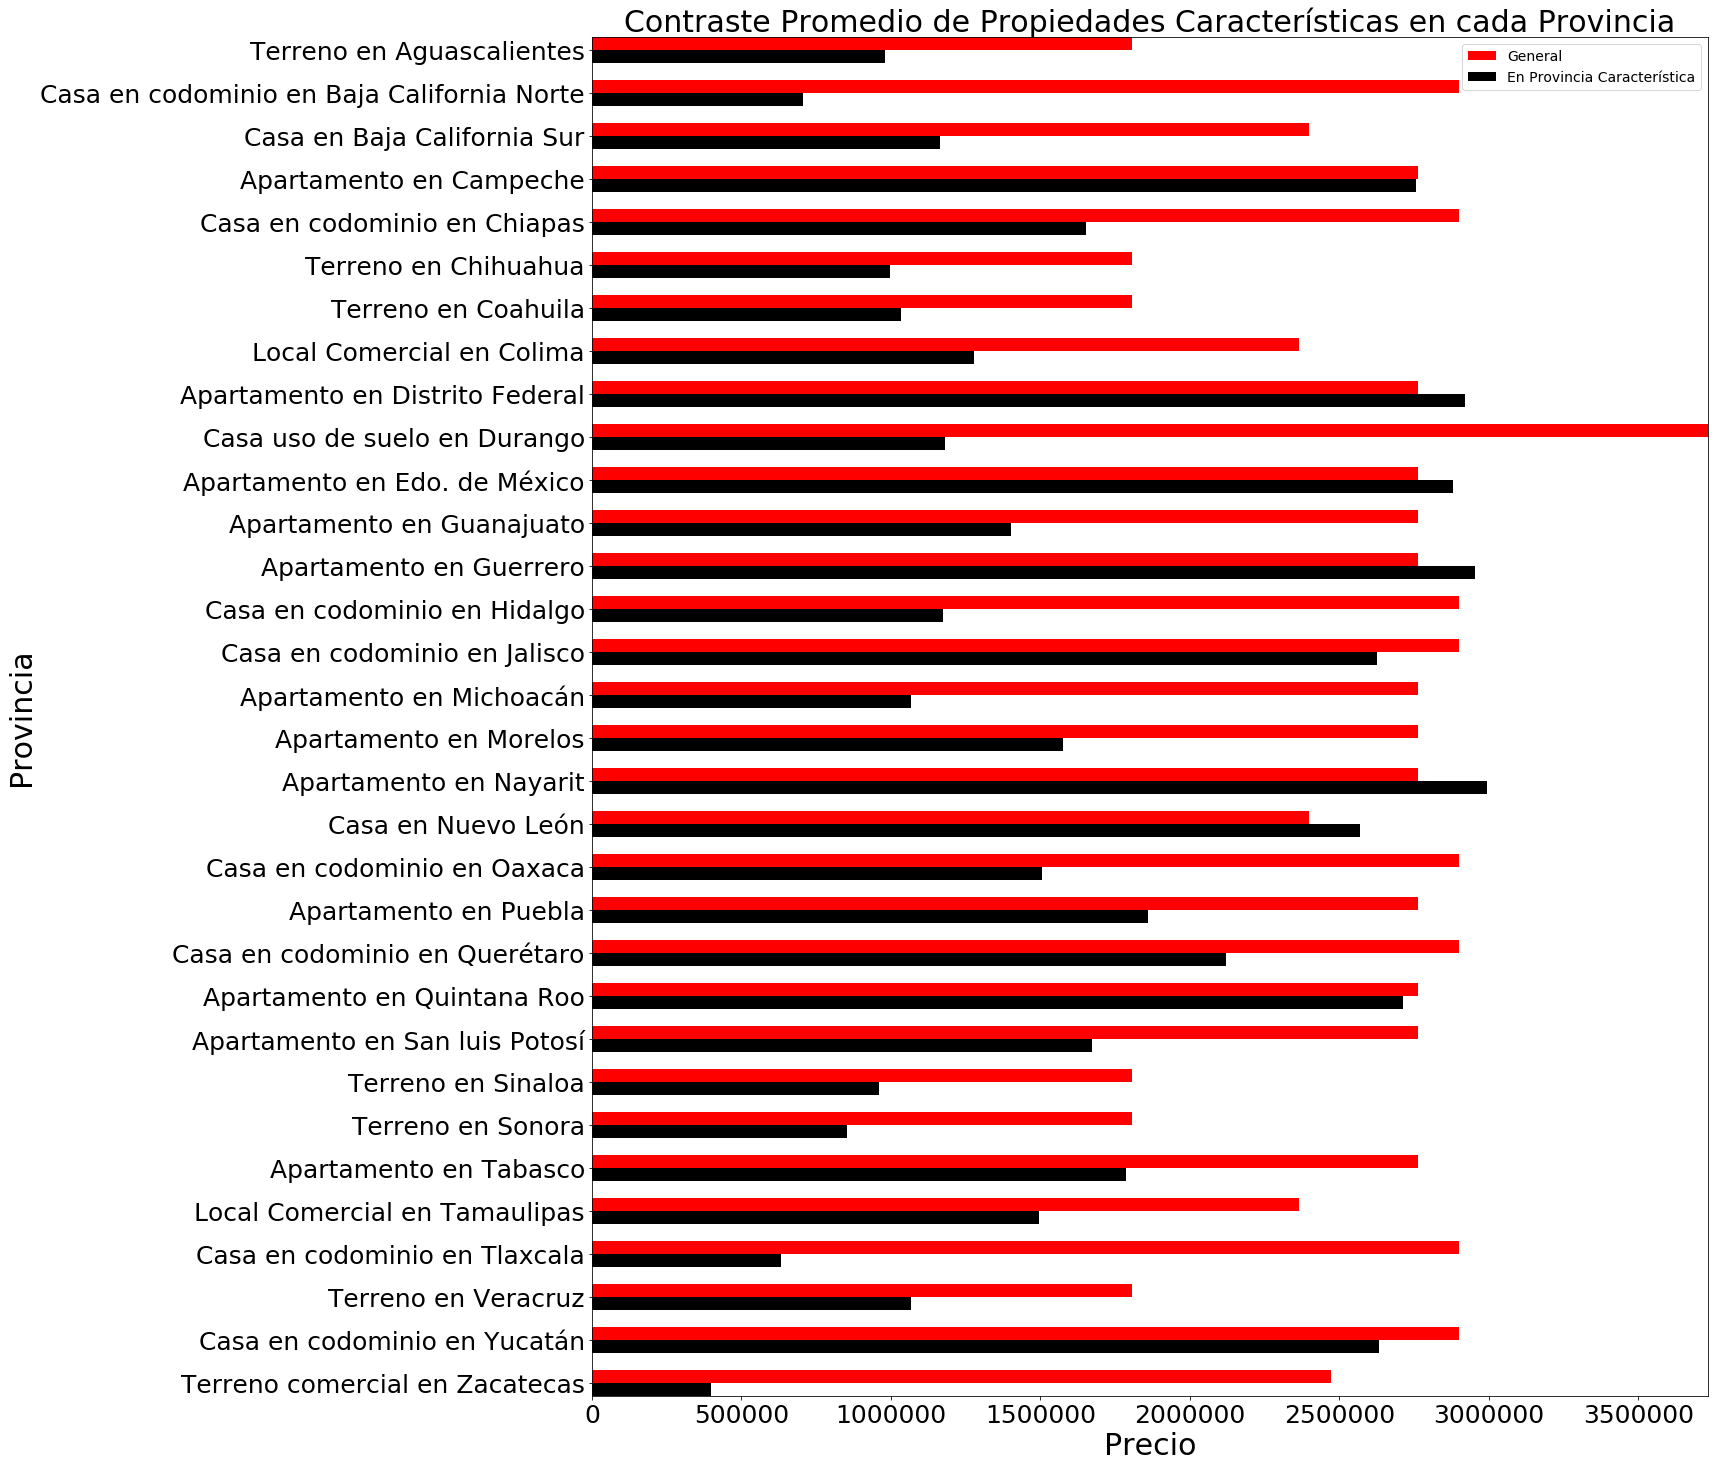

In [245]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

tipo = ['Terreno','Casa en condominio','Casa','Apartamento','Casa en condominio','Terreno','Terreno',
         'Local Comercial','Apartamento','Casa uso de suelo','Apartamento','Apartamento',
         'Apartamento','Casa en condominio','Casa en condominio','Apartamento','Apartamento',
         'Apartamento','Casa','Casa en condominio','Apartamento','Casa en condominio',
         'Apartamento','Apartamento','Terreno','Terreno','Apartamento',
         'Local Comercial','Casa en condominio','Terreno','Casa en condominio','Terreno comercial']

#Promedio de precio en la propiedad especialidad de la
promProv = []

#Promedio de precio por tipo de propiedad
prom = []

for i in range(32):
    promProv.append( dfok[ ( dfok['Provincia'] == prov[i] ) &  ( dfok['TipoPropiedad'] == tipo[i] ) ]['Precio'].mean() )
    prom.append(  dfok[ dfok['TipoPropiedad'] == tipo[i] ]['Precio'].mean() )
    
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (20, 25))
plt.barh(x - (ancho/2), prom, ancho, color = 'red', label = 'General')
plt.barh(x + (ancho/2), promProv, ancho, color = 'black', label = 'En Provincia Característica')


prov2 = ['Terreno en Aguascalientes','Casa en codominio en Baja California Norte',
    'Casa en Baja California Sur','Apartamento en Campeche',
	'Casa en codominio en Chiapas','Terreno en Chihuahua','Terreno en Coahuila',
        'Local Comercial en Colima','Apartamento en Distrito Federal',
		'Casa uso de suelo en Durango',
		'Apartamento en Edo. de México','Apartamento en Guanajuato',
        'Apartamento en Guerrero','Casa en codominio en Hidalgo',
		 'Casa en codominio en Jalisco','Apartamento en Michoacán','Apartamento en Morelos'
		 ,'Apartamento en Nayarit','Casa en Nuevo León',
        'Casa en codominio en Oaxaca',
		'Apartamento en Puebla','Casa en codominio en Querétaro',
		'Apartamento en Quintana Roo','Apartamento en San luis Potosí','Terreno en Sinaloa',
        'Terreno en Sonora','Apartamento en Tabasco',
		'Local Comercial en Tamaulipas',
		'Casa en codominio en Tlaxcala','Terreno en Veracruz','Casa en codominio en Yucatán',
		'Terreno comercial en Zacatecas' ]

# Título
plt.title("Contraste Promedio de Propiedades Características en cada Provincia", fontsize = 30)

plt.yticks( np.arange(len(prov2)), np.arange(len(prov2)) + 1)
ax.set_yticklabels(prov2, fontsize=17)

p1 = plt.xlabel("Precio", fontsize = 30);
p2 = plt.ylabel("Provincia", fontsize = 30);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 25)
plt.tick_params(axis='both', which='minor', labelsize = 25)
plt.legend(prop={'size': 14})

ax.invert_yaxis()

In [246]:
np.arange(len(prov))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [247]:
len(dfok.groupby('TipoPropiedad')['Precio'].mean().unique()) == (len(dfok['TipoPropiedad'].unique()) - 1)

True

In [248]:
len(dfok.groupby('TipoPropiedad')['Precio'].mean().unique())

24

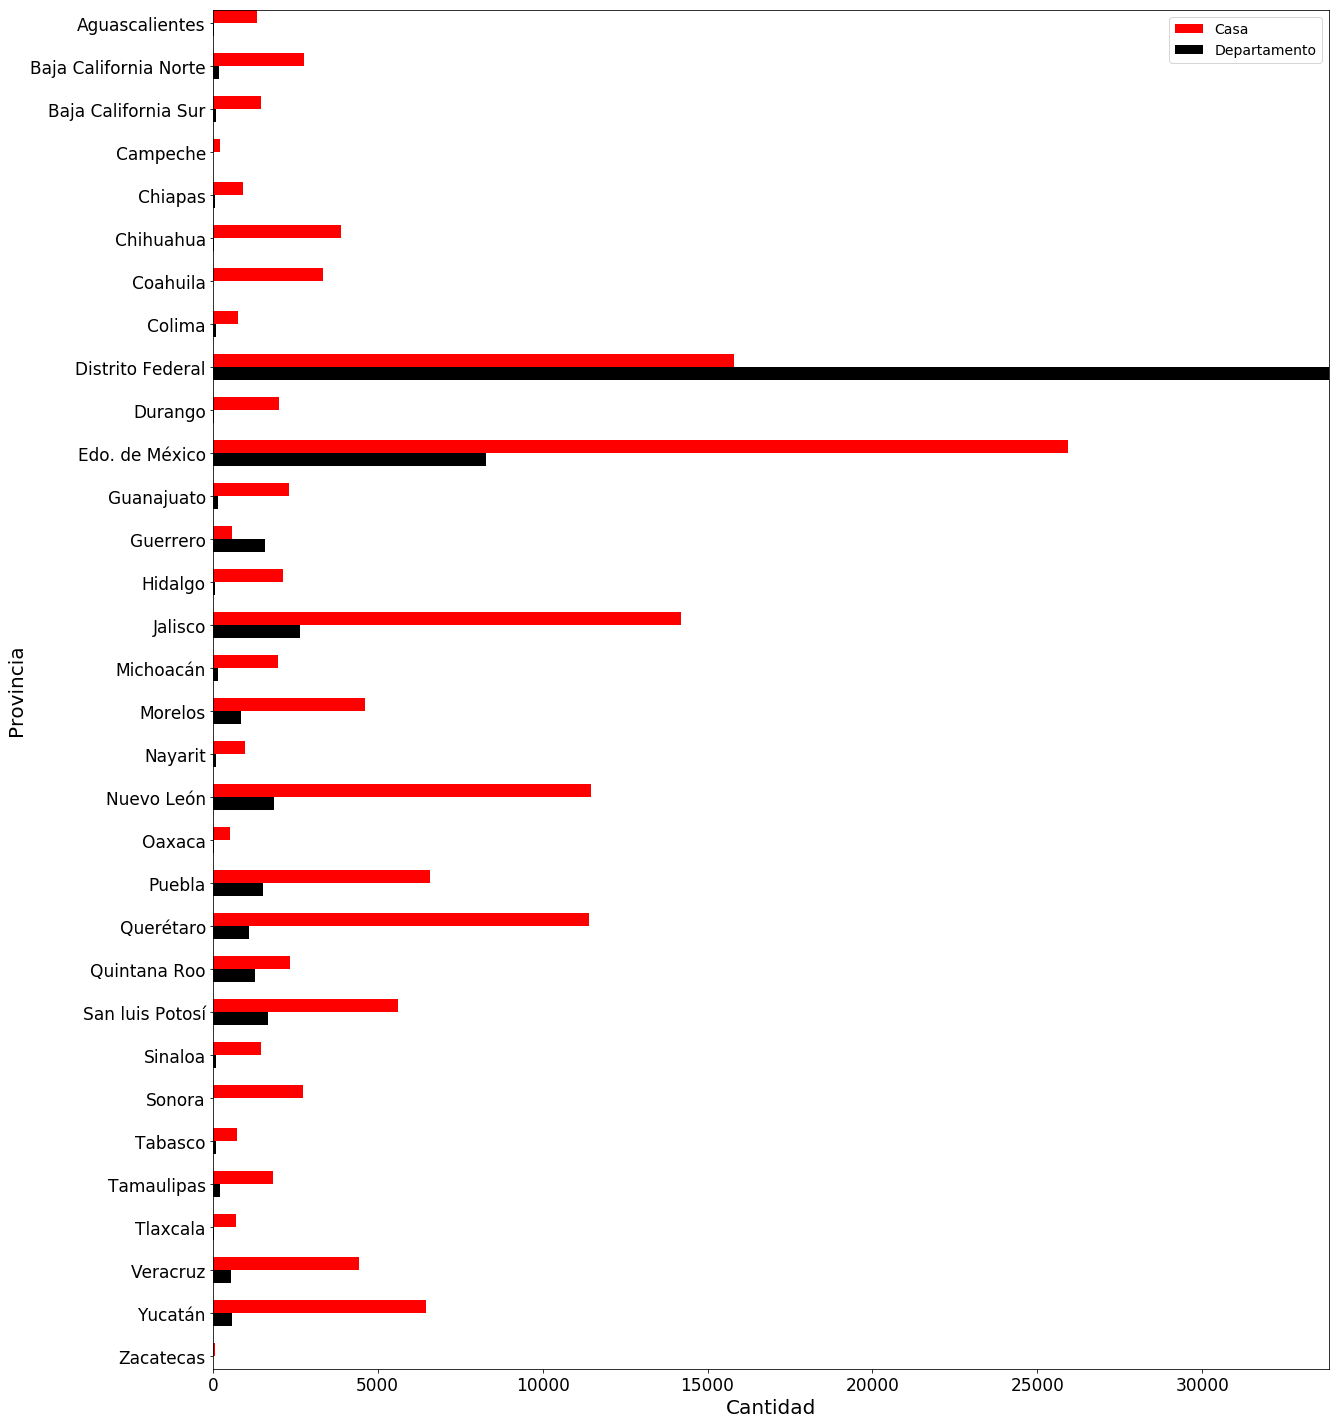

In [249]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

casas = []
dptos = []

for i in range(32):
    casas.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Casa' ) ]['Precio'].count() )
    dptos.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Apartamento' ) ]['Precio'].count() )
        
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (20, 25))
plt.barh(x - (ancho/2), casas, ancho, color = 'red', label = 'Casa')
plt.barh(x + (ancho/2), dptos, ancho, color = 'black', label = 'Departamento')

plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
ax.set_yticklabels(prov, fontsize=17)

p1 = plt.xlabel("Cantidad", fontsize = 20);
p2 = plt.ylabel("Provincia", fontsize = 20);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.legend(prop={'size': 14})

ax.invert_yaxis()

<BarContainer object of 27 artists>

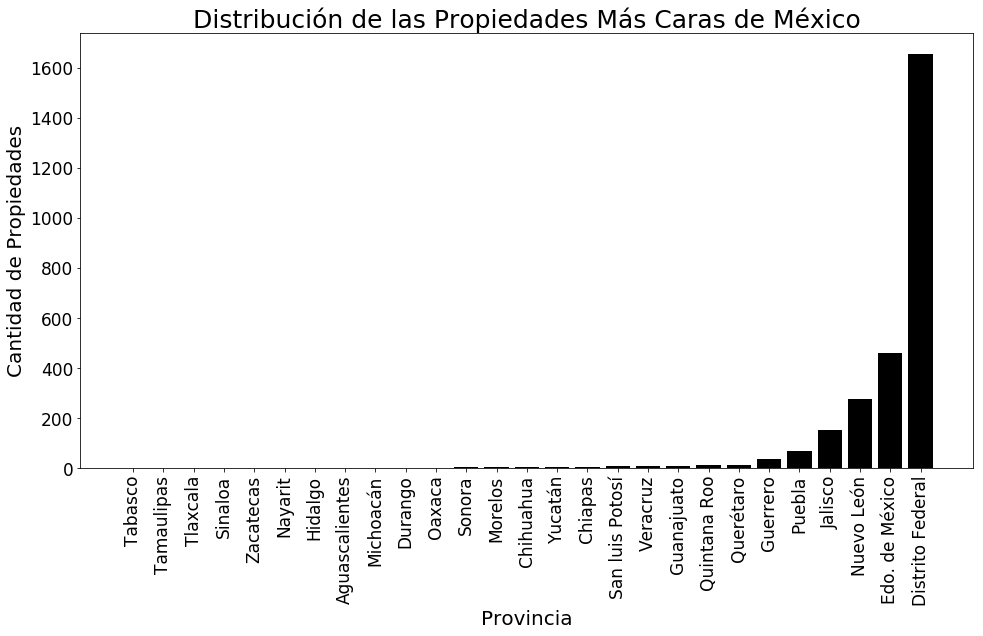

In [250]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] > 10000000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] > 10000000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] > 10000000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] > 10000000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Caras de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



<BarContainer object of 32 artists>

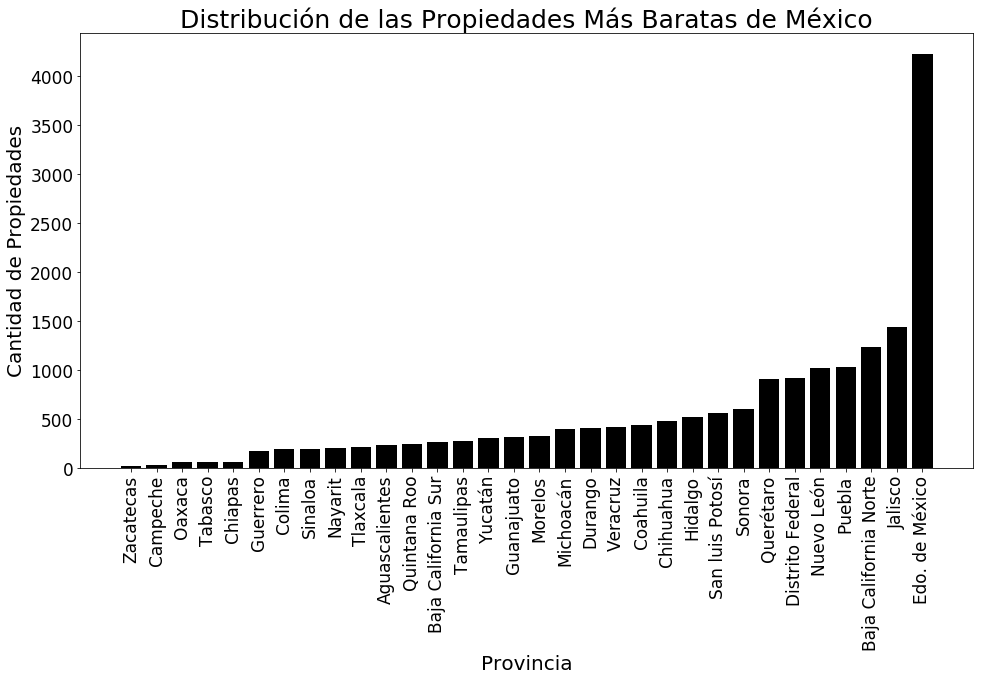

In [251]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] < 500000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] < 500000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] < 500000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] < 500000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Baratas de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



<BarContainer object of 7 artists>

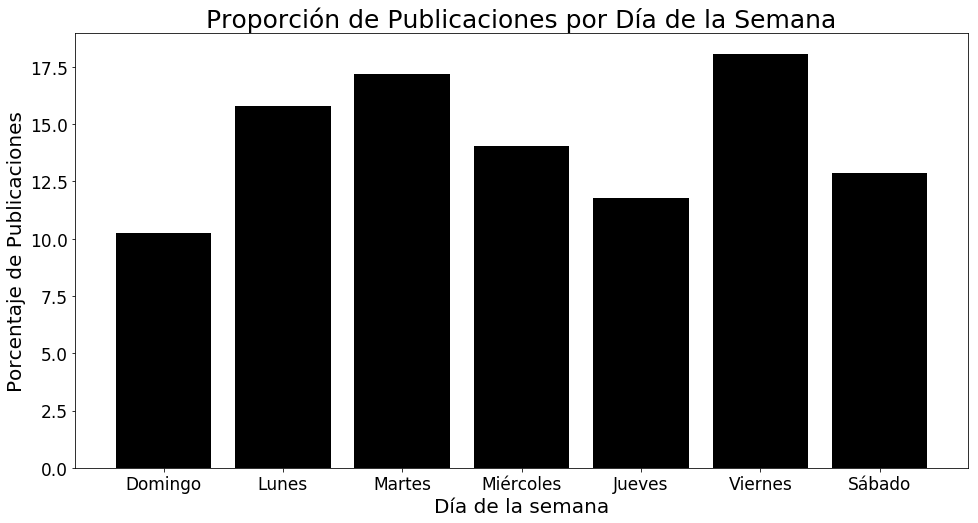

In [252]:
cantPub = [ 
             dfok[ dfok['Fecha'].dt.dayofweek == 6 ]['ID'].count() / 240000 * 100,
            dfok[ dfok['Fecha'].dt.dayofweek == 0 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 1 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 2 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 5 ]['ID'].count()  / 240000 * 100
          ]

dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

dfdias = pd.DataFrame()
dfdias['Días'] = dias
dfdias['Pubs'] = cantPub

# Variables a graficar
x = dias
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Día de la semana", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Día de la Semana", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

<BarContainer object of 12 artists>

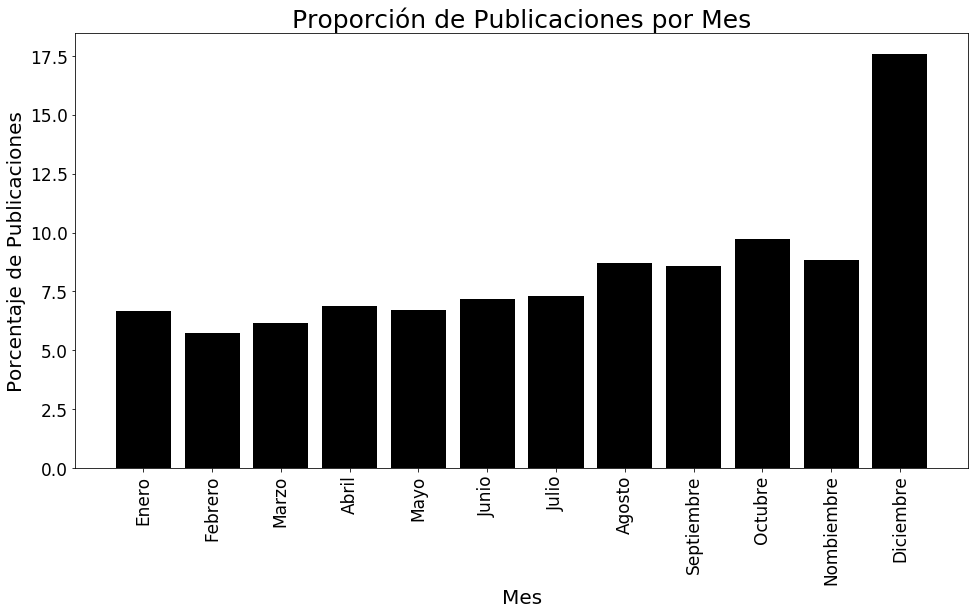

In [253]:
cantPub = [ 
            dfok[ dfok['Fecha'].dt.month == 1 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 2 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 5 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 6 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 7 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 8 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 9 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 10 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 11 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 12 ]['ID'].count()  / 240000 * 100
          ]

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Nombiembre', 'Diciembre']

# Variables a graficar
x = meses
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Mes", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Mes", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

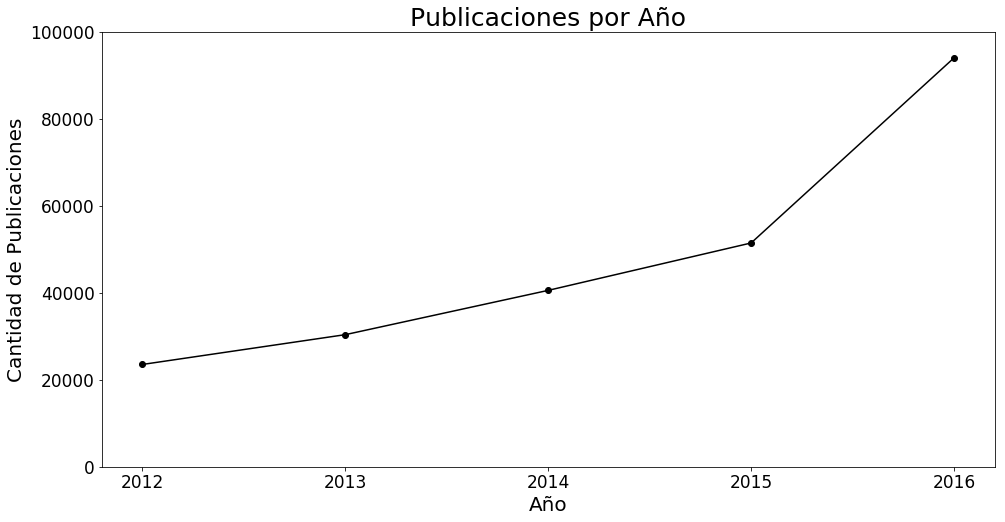

In [254]:
cantPub = [ 
            dfok[ dfok['Fecha'].dt.year == 2012 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2013 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2014 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2015 ]['ID'].count(),
           dfok[ dfok['Fecha'].dt.year == 2016 ]['ID'].count(),
          ]

años = ['2012', '2013', '2014', '2015', '2016']

# Variables a graficar
x = años
y = cantPub

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Cantidad de Publicaciones", fontsize = 20);
plt.xlabel("Año", fontsize = 20);

# Título
plt.title("Publicaciones por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 100000]);
#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, y, color = 'black', linestyle = '-', marker = 'o')

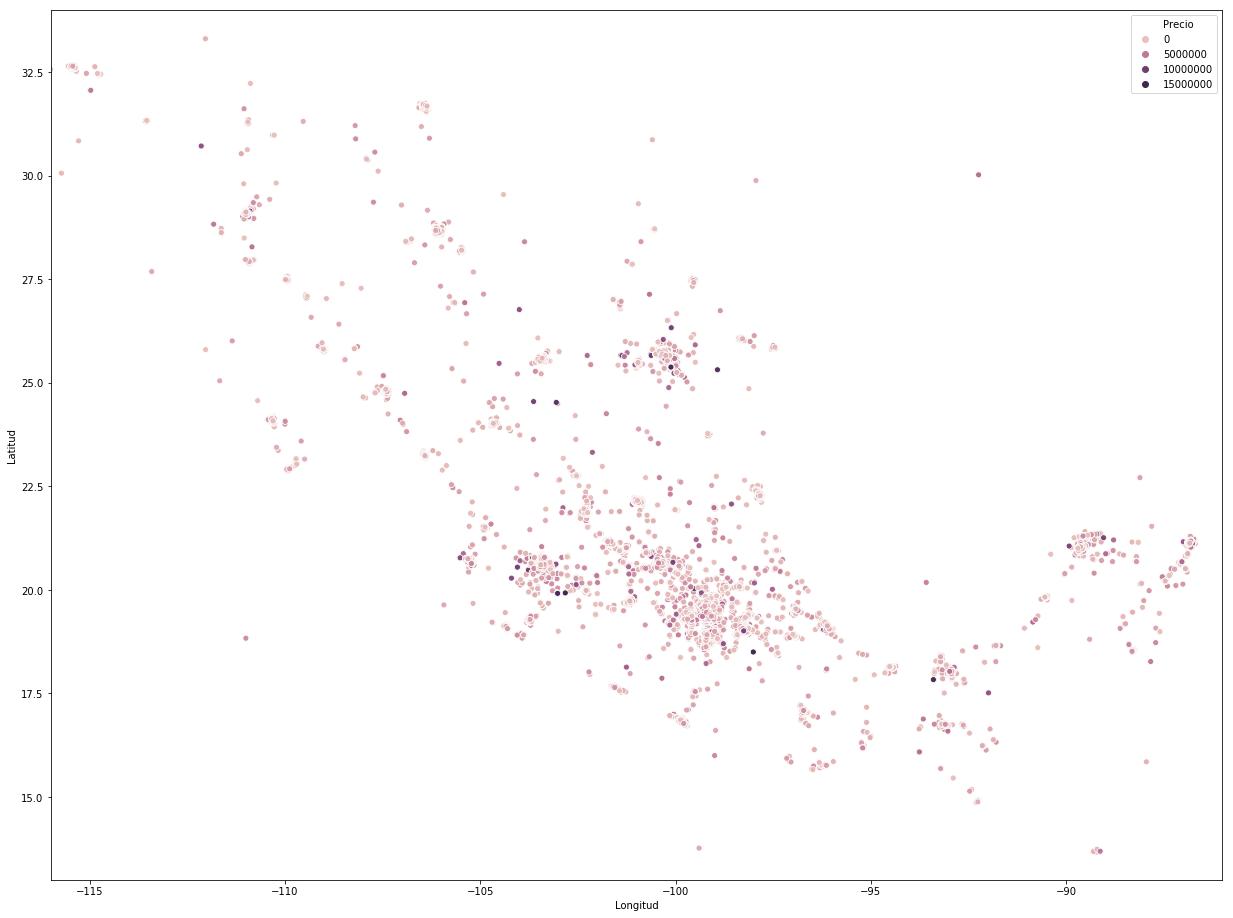

In [255]:
a = dfok['Longitud']
b = dfok['Latitud']
c = dfok['Precio']

dfnuevo = pd.DataFrame()
dfnuevo['Longitud'] = a
dfnuevo['Latitud'] = b
dfnuevo['Precio'] = c

dfnuevo = dfnuevo.dropna()

grafico, ax = plt.subplots(figsize = (21, 16));

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

cmap = sb.cubehelix_palette(dark = .2, light = .8, as_cmap = True)
#cmap = sb.hls_palette( len( dfnuevo['Precio'] ) )
sb.scatterplot(x = 'Longitud', y = 'Latitud', hue = 'Precio', palette = cmap, data = dfnuevo)




No handles with labels found to put in legend.


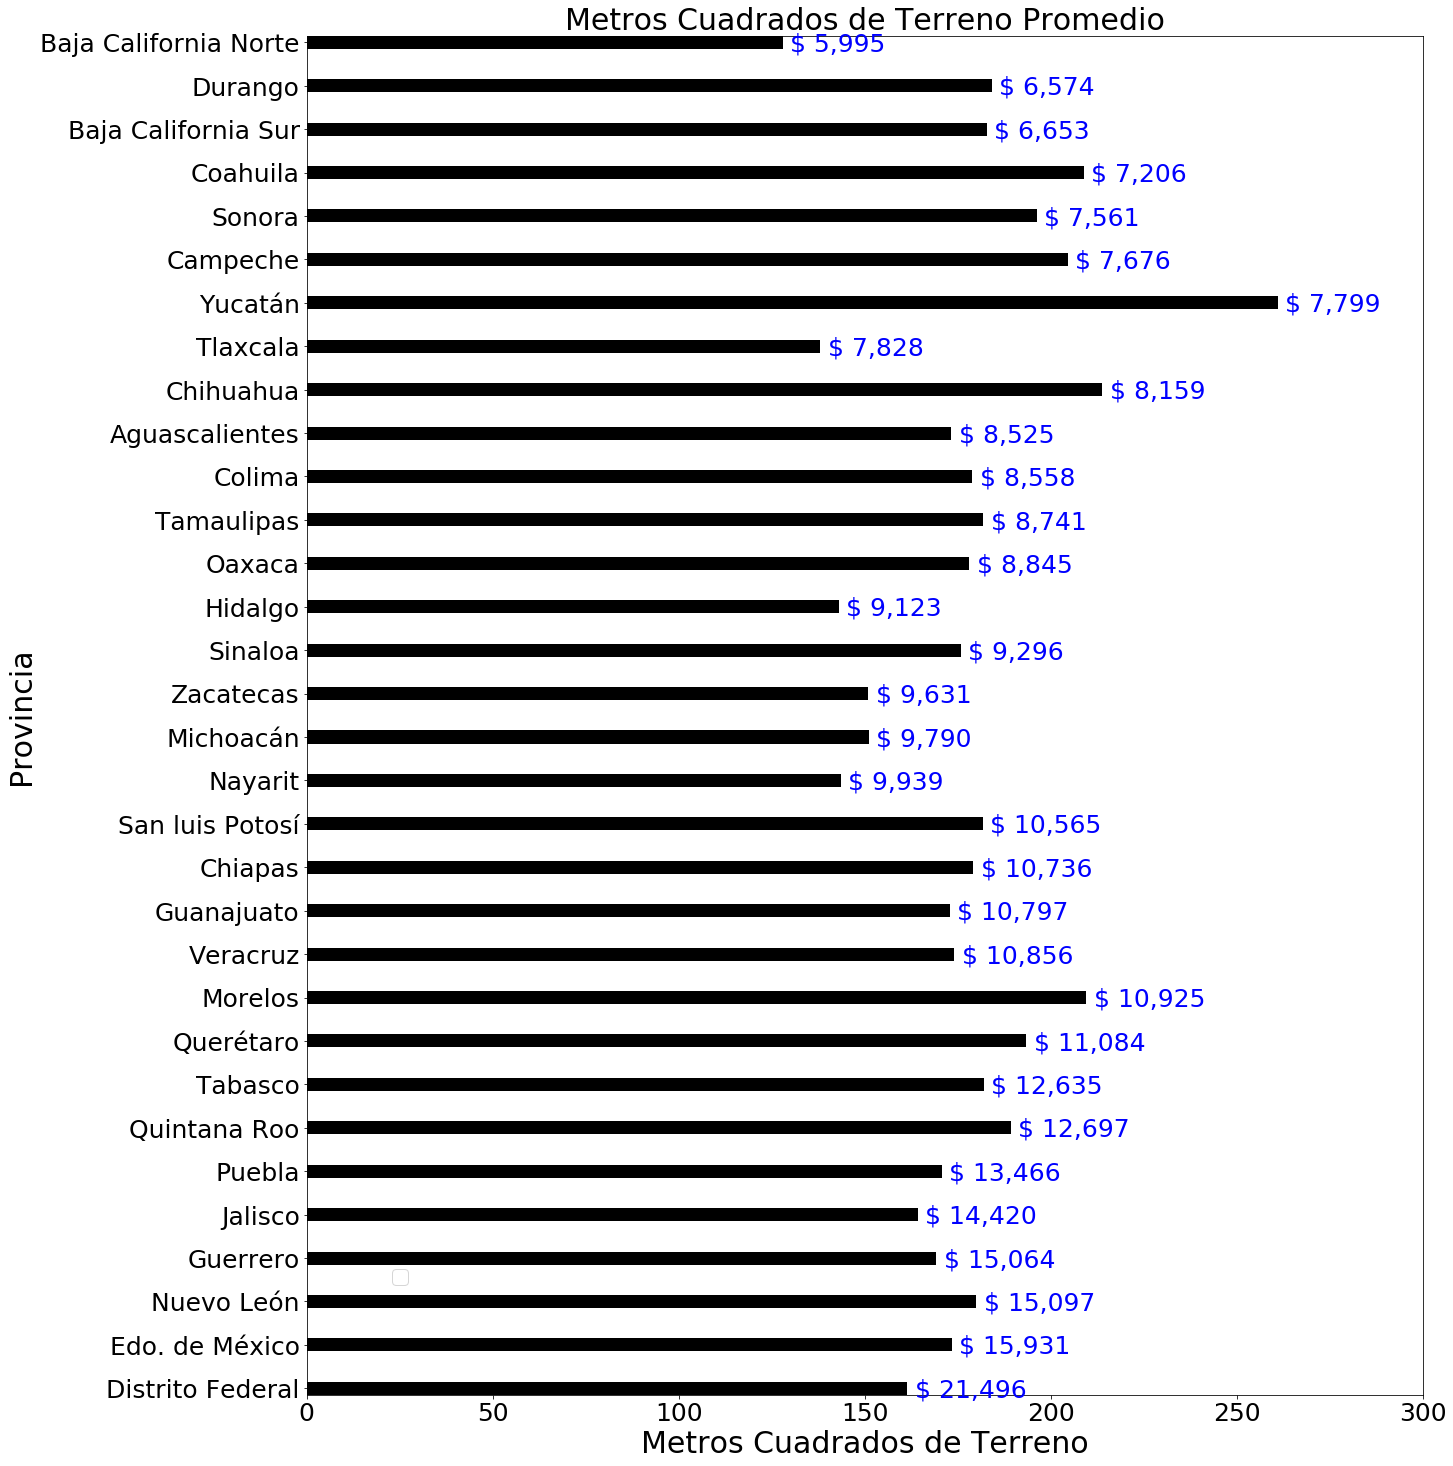

In [256]:
def analizarporm2(tipom, titulo, xaxis):
    dfms = pd.DataFrame()
    dfms['Provincia'] = dfok['Provincia'].dropna().sort_values().unique()
    dfms['MetrosTerreno'] = dfok.groupby('Provincia').mean()[tipom].to_list()
    dfms['PPPM2'] = ( dfok.sort_values('Provincia').groupby('Provincia')['Precio'].mean() /     \
           dfok.sort_values('Provincia').groupby('Provincia')[tipom].mean()
           ).to_list()

    dfms = dfms.sort_values('PPPM2')

    x = np.arange(len(dfms['Provincia']))

    ancho = 0.3
    fig, ax = plt.subplots(figsize = (20, 25))
    plt.barh(x, dfms['MetrosTerreno'], ancho, color = 'black')

    ##########################

    plt.title(titulo, fontsize = 30)

    y = np.arange(len(dfms['Provincia']))

    plt.yticks(y , y + 1)
    ax.set_yticklabels(dfms['Provincia'], fontsize=17)

    plt.xlabel(xaxis, fontsize = 30);
    plt.ylabel("Provincia", fontsize = 30);
    plt.autoscale(tight = True)

    plt.tick_params(axis='both', which='major', labelsize = 25)
    plt.tick_params(axis='both', which='minor', labelsize = 25)
    
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})
    ax.invert_yaxis()

    plt.xlim([0, 300]);

    l = dfms['MetrosTerreno'].to_list()

    ppm2 = dfms['PPPM2'].to_list()

    # Agregar texto en una posición específica
    for i in range( len(dfms['Provincia']) ):
        plt.text(x = l[i] + 2, y = i + 0.2, s = '$ {:,.0f}'.format(ppm2[i]), size = 25, color = 'blue')


analizarporm2('MetrosCuadradosTotales', "Metros Cuadrados de Terreno Promedio", "Metros Cuadrados de Terreno")

No handles with labels found to put in legend.


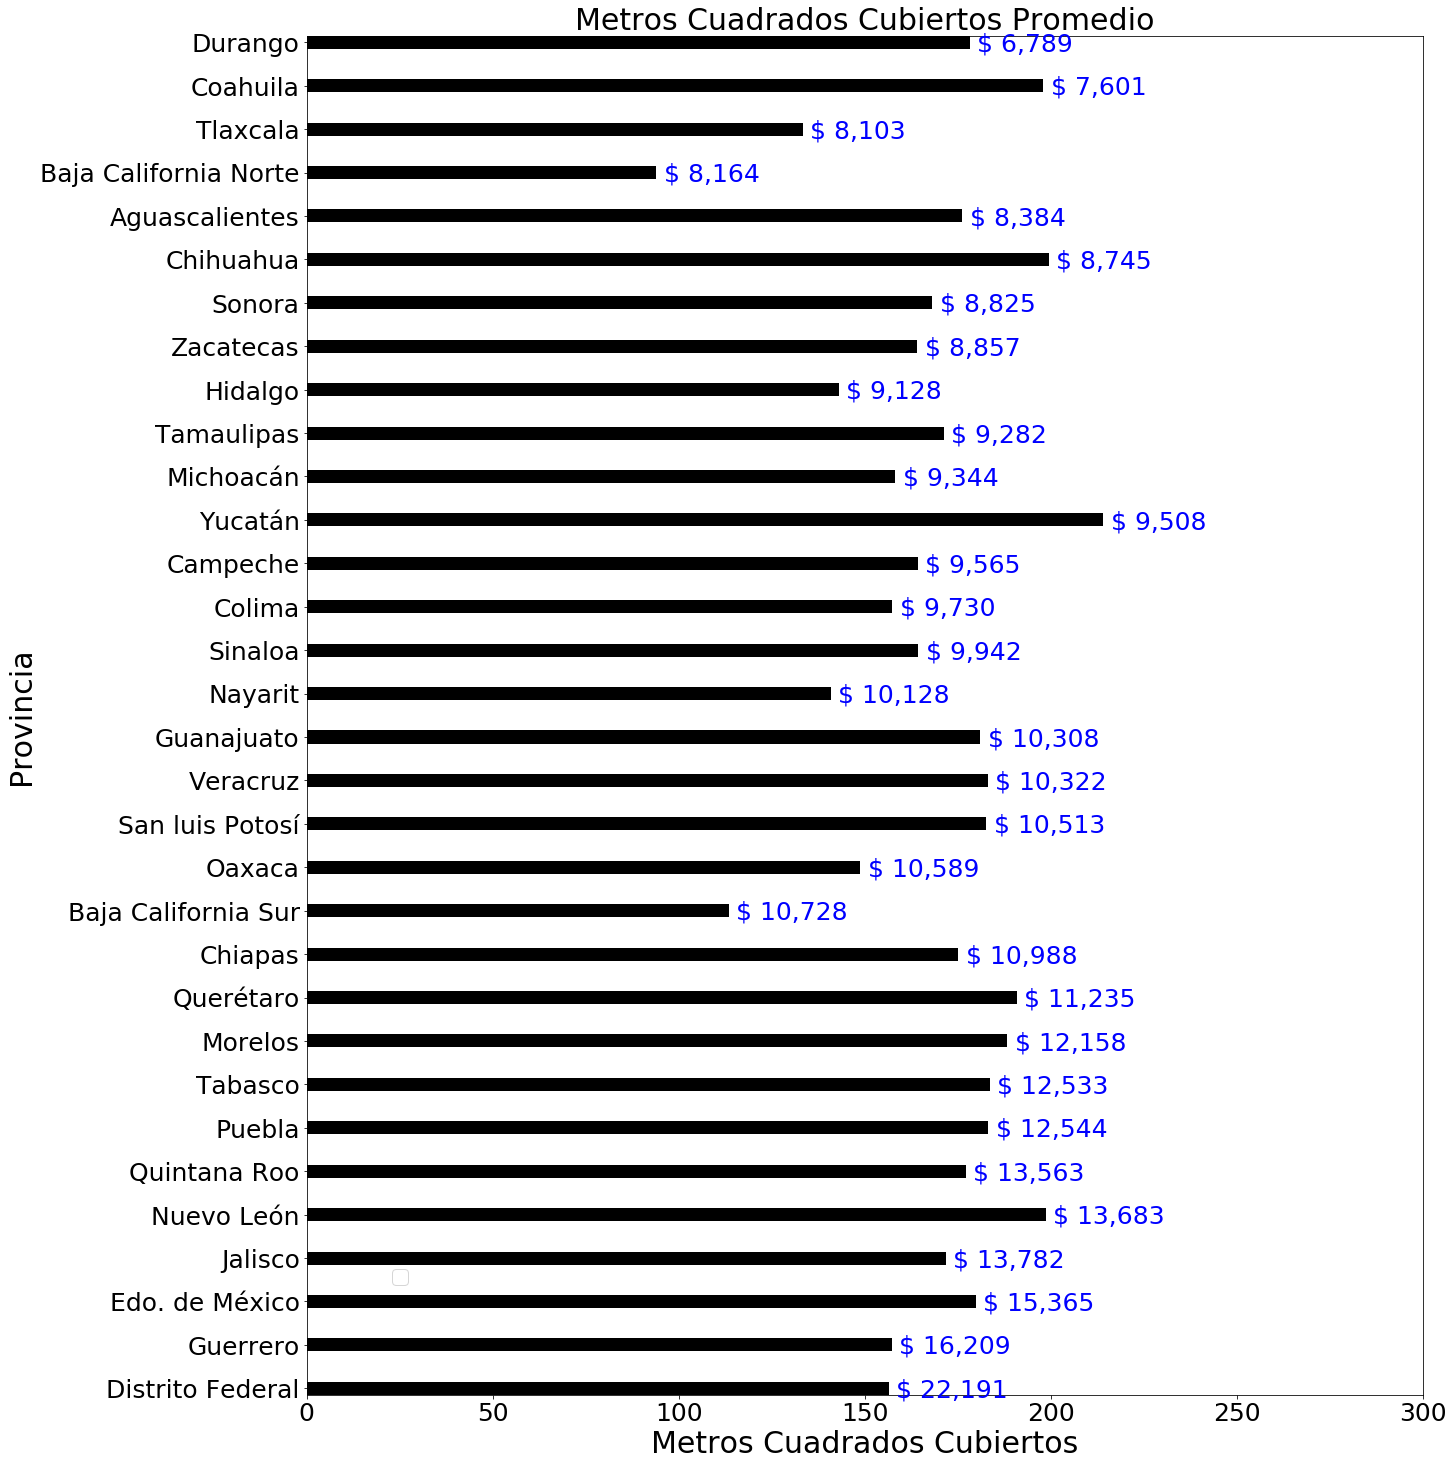

In [257]:
analizarporm2('MetrosCuadradosCubiertos', "Metros Cuadrados Cubiertos Promedio", "Metros Cuadrados Cubiertos")

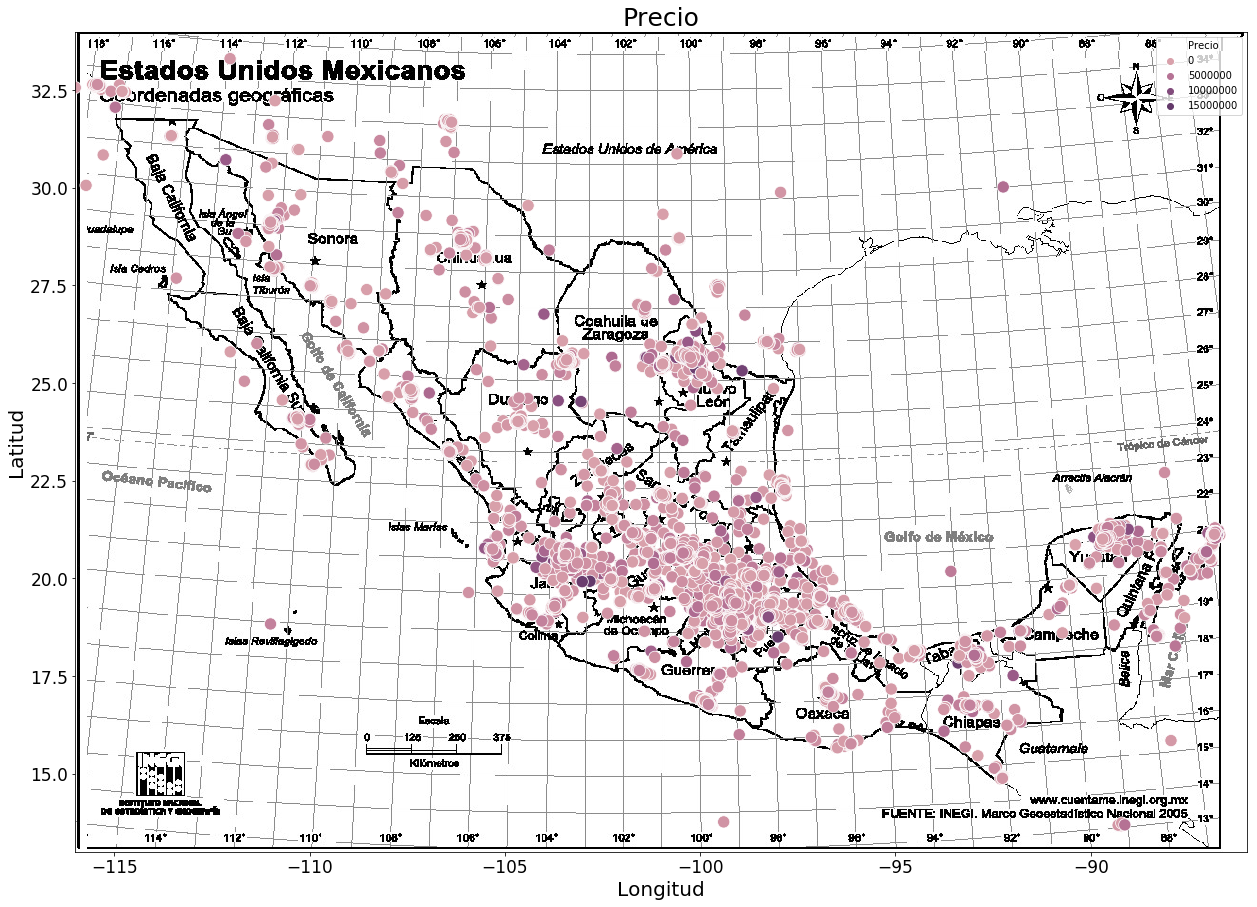

In [258]:
dfnuevo = pd.DataFrame()
dfnuevo['Longitud'] =  dfok['Longitud']
dfnuevo['Latitud'] = dfok['Latitud']
dfnuevo['Precio'] = dfok['Precio']

dfnuevo = dfnuevo.dropna()

grafico, ax = plt.subplots(figsize = (21, 16));

# Límites para cada coordenada
img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Precio", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

cmap = sb.cubehelix_palette(dark = .3, light = .7, as_cmap = True)
#cmap = sb.color_palette(as_cmap = True)
#cmap = sb.color_palette("Paired", n_colors = dfnuevo['Precio'].nunique()) ##ESTE

#Cajita
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

#cmap = sb.hls_palette( len( dfnuevo['Precio'] ) )
ax = sb.scatterplot(x = 'Longitud', y = 'Latitud', hue = 'Precio', palette = cmap, data = dfnuevo, s = 150)

